In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for Nifty 50
ticker_symbol = "^NSEI"  # Nifty 50 index symbol

# Fetch historical data for the last 5 years
nifty_data = yf.download(ticker_symbol, start="2014-01-01", end="2024-01-01")

# Display the first few rows of the data
print(nifty_data.head())

# Optionally, save the data to a CSV file
nifty_data.to_csv("Nifty50_Historical_Data.csv")

[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open  Volume
Ticker            ^NSEI        ^NSEI        ^NSEI        ^NSEI   ^NSEI
Date                                                                  
2014-01-02  6221.149902  6358.299805  6211.299805  6301.250000  158100
2014-01-03  6211.149902  6221.700195  6171.250000  6194.549805  139000
2014-01-06  6191.450195  6224.700195  6170.250000  6220.850098  118300
2014-01-07  6162.250000  6221.500000  6144.750000  6203.899902  138600
2014-01-08  6174.600098  6192.100098  6160.350098  6178.049805  146900


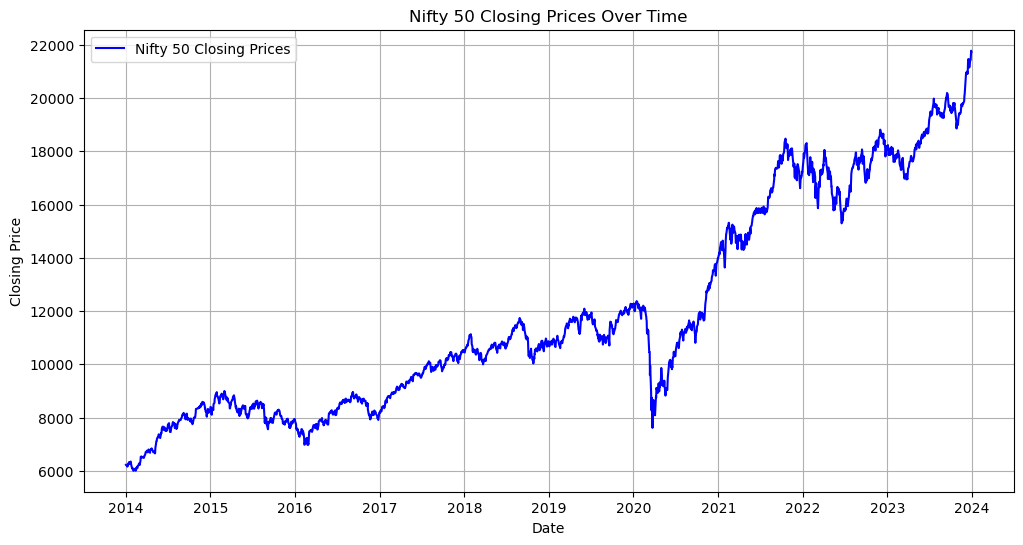

In [5]:
import matplotlib.pyplot as plt

# Assuming 'nifty_data' is your DataFrame
plt.figure(figsize=(12,6))
plt.plot(nifty_data['Close'], label='Nifty 50 Closing Prices', color='blue')
plt.title('Nifty 50 Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()
plt.show()

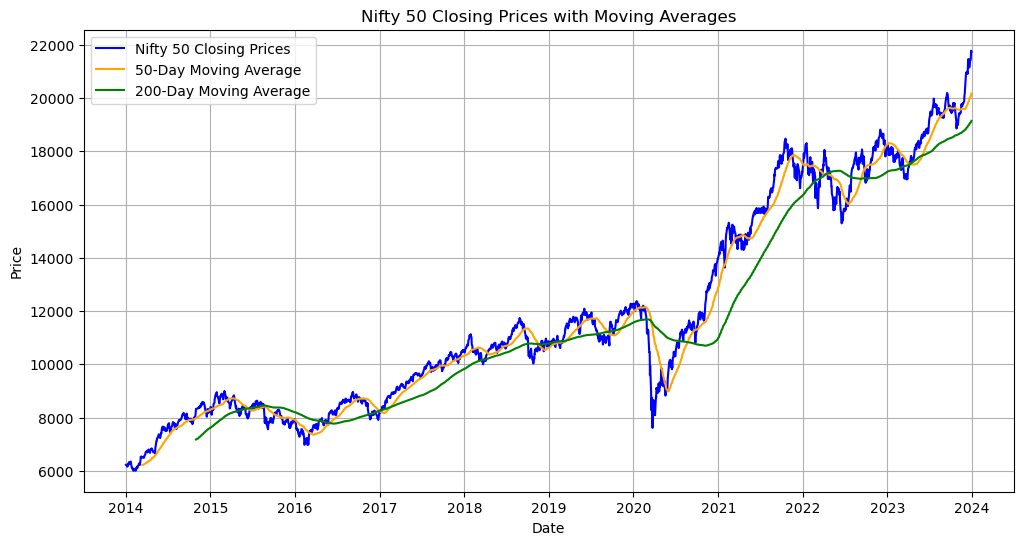

In [7]:
nifty_data['50_MA'] = nifty_data['Close'].rolling(window=50).mean()
nifty_data['200_MA'] = nifty_data['Close'].rolling(window=200).mean()

plt.figure(figsize=(12,6))
plt.plot(nifty_data['Close'], label='Nifty 50 Closing Prices', color='blue')
plt.plot(nifty_data['50_MA'], label='50-Day Moving Average', color='orange')
plt.plot(nifty_data['200_MA'], label='200-Day Moving Average', color='green')
plt.title('Nifty 50 Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

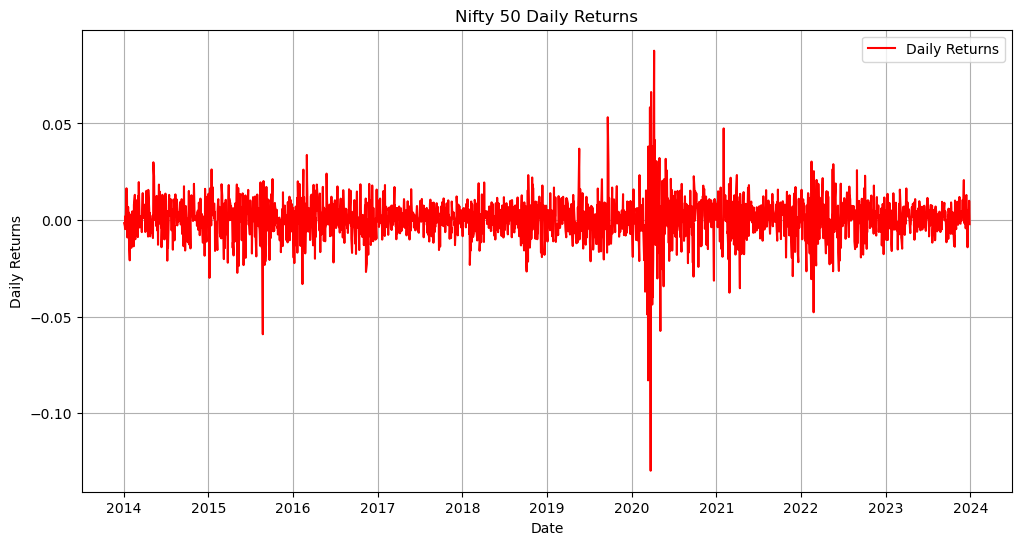

In [9]:
nifty_data['Daily_Return'] = nifty_data['Close'].pct_change()

plt.figure(figsize=(12,6))
plt.plot(nifty_data['Daily_Return'], label='Daily Returns', color='red')
plt.title('Nifty 50 Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.grid()
plt.show()

In [13]:
#  Data Preprocessing
#Cleaning the Dataset:
#Handle missing values using imputation techniques or drop rows/columns if necessary.
#Remove redundant or unnecessary columns (e.g., ticker names if constant).

In [15]:
import pandas as pd

# Load your dataset (assuming 'nifty_data' is already available)
# nifty_data = pd.read_csv('Nifty50_Historical_Data.csv')

# Step 1: Check for missing values
print("Missing values in dataset:\n", nifty_data.isnull().sum())

# Step 2: Handling missing values
# Option 1: Drop rows with missing values
# nifty_data_cleaned = nifty_data.dropna()

# Option 2: Impute missing values (mean for numeric columns)
nifty_data_imputed = nifty_data.fillna(nifty_data.mean())

# Step 3: Removing unnecessary columns
# Dropping the ticker column if it exists and is constant
if 'Ticker' in nifty_data_imputed.columns:
    nifty_data_imputed.drop('Ticker', axis=1, inplace=True)

# Display the cleaned dataset
print("\nCleaned dataset:\n", nifty_data_imputed.head())
print("\nMissing values after cleaning:\n", nifty_data_imputed.isnull().sum())

Missing values in dataset:
 Price         Ticker
Close         ^NSEI       0
High          ^NSEI       0
Low           ^NSEI       0
Open          ^NSEI       0
Volume        ^NSEI       0
50_MA                    49
200_MA                  199
Daily_Return              1
dtype: int64

Cleaned dataset:
 Price             Close         High          Low         Open  Volume  \
Ticker            ^NSEI        ^NSEI        ^NSEI        ^NSEI   ^NSEI   
Date                                                                     
2014-01-02  6221.149902  6358.299805  6211.299805  6301.250000  158100   
2014-01-03  6211.149902  6221.700195  6171.250000  6194.549805  139000   
2014-01-06  6191.450195  6224.700195  6170.250000  6220.850098  118300   
2014-01-07  6162.250000  6221.500000  6144.750000  6203.899902  138600   
2014-01-08  6174.600098  6192.100098  6160.350098  6178.049805  146900   

Price             50_MA        200_MA Daily_Return  
Ticker                                           

In [17]:
nifty_data_imputed.to_csv("Nifty50_Cleaned_Data.csv")

In [61]:
# Assuming nifty_data_imputed is your cleaned DataFrame

# Drop the indicator columns
nifty_cleaned_no_indicators = nifty_data_imputed.drop(columns=['50_MA', '200_MA', 'Daily_Return'])

# Display the cleaned dataset without indicators
print(nifty_cleaned_no_indicators.head())

# Optionally, save this cleaned dataset to a CSV file
nifty_cleaned_no_indicators.to_csv("Nifty50_Cleaned_No_Indicators.csv")

Price             Close         High          Low         Open  Volume
Ticker            ^NSEI        ^NSEI        ^NSEI        ^NSEI   ^NSEI
Date                                                                  
2014-01-02  6221.149902  6358.299805  6211.299805  6301.250000  158100
2014-01-03  6211.149902  6221.700195  6171.250000  6194.549805  139000
2014-01-06  6191.450195  6224.700195  6170.250000  6220.850098  118300
2014-01-07  6162.250000  6221.500000  6144.750000  6203.899902  138600
2014-01-08  6174.600098  6192.100098  6160.350098  6178.049805  146900


In [65]:
import pandas as pd

# Example: Load the data if it's from a CSV file
data = pd.read_csv('Nifty50_Cleaned_No_Indicators_main.csv')

In [67]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Option 1: Forward fill to fill missing values
data_filled = data.fillna(method='ffill')

# Option 2: Drop rows with any missing values
# data_cleaned = data.dropna()

# Show the cleaned DataFrame after forward fill
print("\nData after forward filling missing values:\n", data_filled.head())

# If you opted to drop rows, you would display that as well
# print("\nData after dropping missing values:\n", data_cleaned.head())

Missing values in each column:
 Price     0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

Data after forward filling missing values:
         Price        Close         High          Low         Open  Volume
0  2014-01-02  6221.149902  6358.299805  6211.299805  6301.250000  158100
1  2014-01-03  6211.149902  6221.700195  6171.250000  6194.549805  139000
2  2014-01-06  6191.450195  6224.700195  6170.250000  6220.850098  118300
3  2014-01-07  6162.250000  6221.500000  6144.750000  6203.899902  138600
4  2014-01-08  6174.600098  6192.100098  6160.350098  6178.049805  146900


C:\Users\prana\AppData\Local\Temp\ipykernel_1092\1050446047.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled = data.fillna(method='ffill')


In [69]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assume 'data' is your cleaned DataFrame containing the relevant price columns
# First, we will drop any non-numeric columns if present (like Date)
data_numeric = data.drop(columns=['Price'])  # Drop 'Price' if necessary

# Initialize the Min-Max Scaler
min_max_scaler = MinMaxScaler()

# Fit and transform the data
data_scaled_min_max = min_max_scaler.fit_transform(data_numeric)

# Convert back to DataFrame for easy handling
data_scaled_min_max = pd.DataFrame(data_scaled_min_max, columns=data_numeric.columns)

# Display the scaled data
print("\nData scaled using Min-Max Scaler:\n", data_scaled_min_max.head())


Data scaled using Min-Max Scaler:
       Close      High       Low      Open    Volume
0  0.013959  0.021573  0.017657  0.022397  0.087300
1  0.013326  0.012918  0.015113  0.015640  0.076753
2  0.012077  0.013109  0.015050  0.017305  0.065323
3  0.010226  0.012906  0.013430  0.016232  0.076532
4  0.011009  0.011043  0.014421  0.014595  0.081115


In [71]:
# Initialize the Standard Scaler
standard_scaler = StandardScaler()

# Fit and transform the data
data_scaled_standard = standard_scaler.fit_transform(data_numeric)

# Convert back to DataFrame for easy handling
data_scaled_standard = pd.DataFrame(data_scaled_standard, columns=data_numeric.columns)

# Display the scaled data
print("\nData scaled using Standard Scaler:\n", data_scaled_standard.head())


Data scaled using Standard Scaler:
       Close      High       Low      Open    Volume
0 -1.432727 -1.409258 -1.424821 -1.414410 -0.749609
1 -1.435247 -1.443571 -1.434964 -1.441302 -0.845755
2 -1.440213 -1.442817 -1.435217 -1.434673 -0.949955
3 -1.447574 -1.443621 -1.441675 -1.438945 -0.847768
4 -1.444461 -1.451006 -1.437724 -1.445460 -0.805988


In [73]:
import numpy as np

# Function to create sequences
def create_sequences(data, sequence_length):
    X, y = [], []
    
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])  # Input data (sequence of previous days)
        y.append(data[i + sequence_length])     # Output data (next day)
    
    return np.array(X), np.array(y)

# Example usage:
sequence_length = 5  # Number of previous days to consider for prediction
X, y = create_sequences(data_scaled_min_max.values, sequence_length)  # Use scaled data for sequences

# Display the shape of the created sequences
print("Shape of X (input sequences):", X.shape)
print("Shape of y (output values):", y.shape)

Shape of X (input sequences): (2448, 5, 5)
Shape of y (output values): (2448, 5)


In [75]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets using an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1958, 5, 5)
Shape of X_test: (490, 5, 5)
Shape of y_train: (1958, 5)
Shape of y_test: (490, 5)


In [77]:
##LSTM

In [79]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split

# Assuming X and y are prepared sequences
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50, activation='relu'))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(y_train.shape[1]))  # Output layer
lstm_model.compile(optimizer='adam', loss='mse')

# Train LSTM Model
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# GRU Model
gru_model = Sequential()
gru_model.add(GRU(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(50, activation='relu'))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(y_train.shape[1]))  # Output layer
gru_model.compile(optimizer='adam', loss='mse')

# Train GRU Model
gru_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100


C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.1148 - val_loss: 0.0039
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - val_loss: 0.0032
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - val_loss: 0.0025
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - val_loss: 0.0012
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - val_loss: 0.0019
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - val_loss: 0.0016
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - val_loss: 0.0014
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 - val_loss: 0.0011
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - val_loss: 0.0011
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - val_loss: 0.0010
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - val_loss: 0.0011
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - val_l

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016 - val_loss: 8.2073e-04
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - val_loss: 8.2428e-04
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - val_loss: 8.3964e-04
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016 - val_loss: 8.8189e-04
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013 - val_loss: 8.3603e-04
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - val_loss: 8.2001e-04
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - val_loss: 8.2579e-04
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016 - val_loss: 8.5572e-04
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - val_loss: 8.2062e-04
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - val_loss: 8.2786e-04
Epoch 12/100
62/62 ━━━━

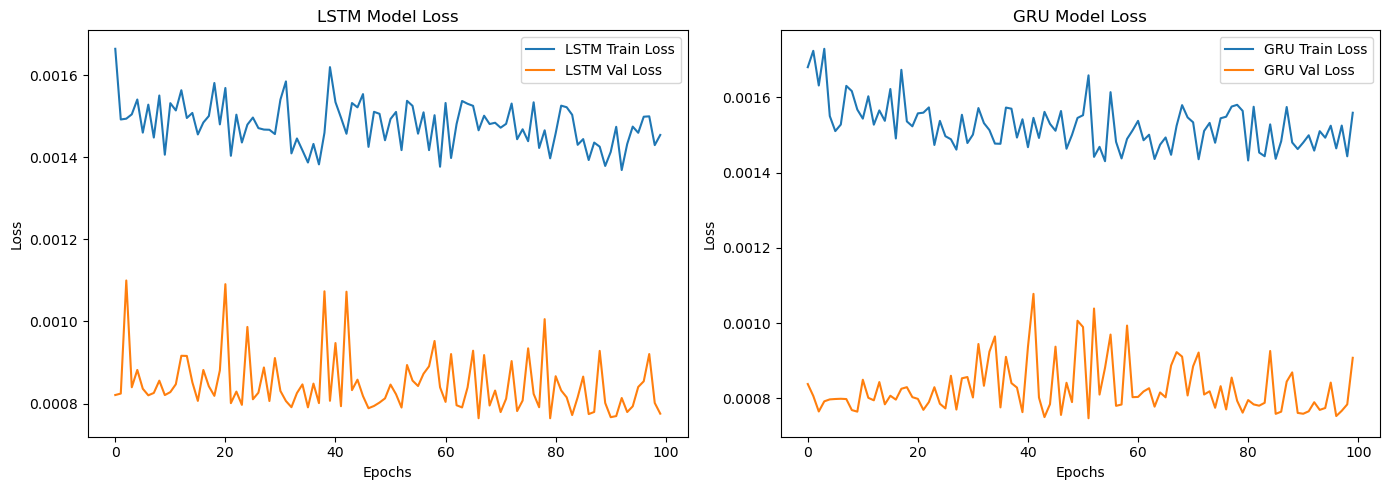

In [89]:
import matplotlib.pyplot as plt

# Assuming you already have lstm_model and gru_model trained 
# Store the history of the models when fitting them
lstm_history = lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
gru_history = gru_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Plot training & validation loss for LSTM
plt.figure(figsize=(14, 5))

# Retrieve and plot LSTM history
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['loss'], label='LSTM Train Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Val Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Retrieve and plot GRU history
plt.subplot(1, 2, 2)
plt.plot(gru_history.history['loss'], label='GRU Train Loss')
plt.plot(gru_history.history['val_loss'], label='GRU Val Loss')
plt.title('GRU Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [91]:
# Evaluate the LSTM model on the test data
lstm_loss = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"LSTM Test Loss: {lstm_loss}")

# Evaluate the GRU model on the test data
gru_loss = gru_model.evaluate(X_test, y_test, verbose=0)
print(f"GRU Test Loss: {gru_loss}")

LSTM Test Loss: 0.000775291002355516
GRU Test Loss: 0.0009078183211386204


In [93]:
#finally i m free accha results agayaa 

In [95]:
#indicator ko ander fekne ki bari 

In [97]:
import pandas as pd

# Load the CSV file
file_path = 'Nifty50_Cleaned_No_Indicators_main.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the data structure
print(df.head())

# Ensure you have a 'Close' column in your DataFrame
if 'Close' not in df.columns:
    raise ValueError("The 'Close' column is missing from the DataFrame.")

# Calculate Simple Moving Average (SMA)
def calculate_sma(data, period):
    return data.rolling(window=period).mean()

# Calculate Exponential Moving Average (EMA)
def calculate_ema(data, period):
    return data.ewm(span=period, adjust=False).mean()

# Calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal=9):
    ema_short = calculate_ema(data['Close'], short_window)
    ema_long = calculate_ema(data['Close'], long_window)
    macd = ema_short - ema_long
    macd_signal = calculate_ema(macd, signal)
    return macd, macd_signal

# Applying the indicators
df['SMA_20'] = calculate_sma(df['Close'], 20)  # 20-day SMA
df['EMA_20'] = calculate_ema(df['Close'], 20)  # 20-day EMA
df['MACD'], df['MACD_Signal'] = calculate_macd(df)

# Display the updated DataFrame
print(df.tail())  # Check the last few rows

# Save the updated DataFrame with indicators back to a CSV file
df.to_csv('Nifty50_Cleaned_With_Indicators.csv', index=False)

        Price        Close         High          Low         Open  Volume
0  2014-01-02  6221.149902  6358.299805  6211.299805  6301.250000  158100
1  2014-01-03  6211.149902  6221.700195  6171.250000  6194.549805  139000
2  2014-01-06  6191.450195  6224.700195  6170.250000  6220.850098  118300
3  2014-01-07  6162.250000  6221.500000  6144.750000  6203.899902  138600
4  2014-01-08  6174.600098  6192.100098  6160.350098  6178.049805  146900
           Price         Close          High           Low          Open  \
2448  2023-12-22  21349.400391  21390.500000  21232.449219  21295.849609   
2449  2023-12-26  21441.349609  21477.150391  21329.449219  21365.199219   
2450  2023-12-27  21654.750000  21675.750000  21495.800781  21497.650391   
2451  2023-12-28  21778.699219  21801.449219  21678.000000  21715.000000   
2452  2023-12-29  21731.400391  21770.300781  21676.900391  21737.650391   

      Volume        SMA_20        EMA_20        MACD  MACD_Signal  
2448  284700  20831.387500  208

In [99]:
#TREND WAALE indicator lstm ke sath

In [101]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load your data into a DataFrame
# data = pd.read_csv('path_to_your_data.csv')  # Example to load your data

# Dropping the 'Price' column since it contains dates
data = data.drop(columns=['Price'])

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences from the scaled data
def create_sequences(data, seq_length=5):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

sequence_length = 5  # Number of previous time steps to consider
X, y = create_sequences(data_scaled, sequence_length)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and compile LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50, activation='relu'))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(y_train.shape[1]))  # Adjust based on output
lstm_model.compile(optimizer='adam', loss='mse')

# Train LSTM model
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Define and compile GRU model
gru_model = Sequential()
gru_model.add(GRU(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(50, activation='relu'))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(y_train.shape[1]))  # Adjust based on output
gru_model.compile(optimizer='adam', loss='mse')

# Train GRU model
gru_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100


C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1082 - val_loss: 0.0044
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - val_loss: 0.0029
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0070 - val_loss: 0.0012
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0057 - val_loss: 0.0011
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053 - val_loss: 0.0012
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0050 - val_loss: 0.0010
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0041 - val_loss: 0.0011
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 - val_loss: 0.0010
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - val_loss: 0.0014
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038 - val_loss: 0.0013
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0038 - val_loss: 0.0016
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - val_l

In [103]:
    # Evaluate the LSTM model on the test data
lstm_loss = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f'LSTM Test Loss: {lstm_loss:.4f}')

# Evaluate the GRU model on the test data
gru_loss = gru_model.evaluate(X_test, y_test, verbose=0)
print(f'GRU Test Loss: {gru_loss:.4f}')

LSTM Test Loss: 0.0009
GRU Test Loss: 0.0009


In [107]:
# Train LSTM model and capture history
lstm_history = lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Train GRU model and capture history
gru_history = gru_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 - val_loss: 9.1649e-04
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - val_loss: 9.0374e-04
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - val_loss: 9.5307e-04
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016 - val_loss: 8.2826e-04
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0015 - val_loss: 8.1587e-04
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - val_loss: 8.2718e-04
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0014 - val_loss: 8.4720e-04
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - val_loss: 9.9055e-04
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014 - val_loss: 8.5724e-04
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0014 - val_loss: 8.7240e-04
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - val_loss: 8.9052e-04
Epoch 12/100
62/62 

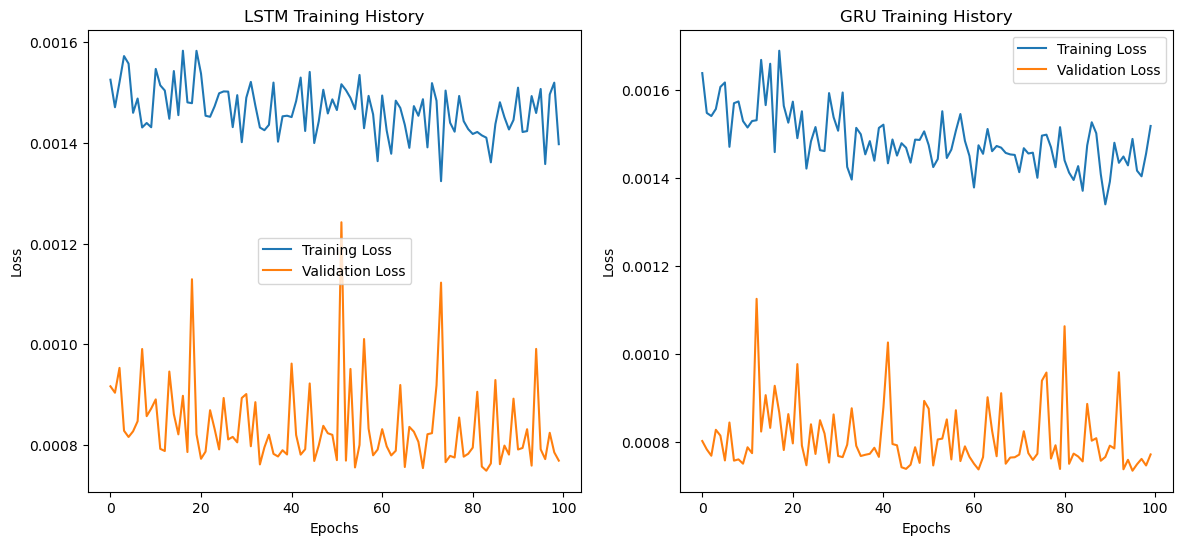

In [108]:
import matplotlib.pyplot as plt

# LSTM Training History
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# GRU Training History
plt.subplot(1, 2, 2)
plt.plot(gru_history.history['loss'], label='Training Loss')
plt.plot(gru_history.history['val_loss'], label='Validation Loss')
plt.title('GRU Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [111]:
# Predictions for the test set
lstm_predictions = lstm_model.predict(X_test)
gru_predictions = gru_model.predict(X_test)

# Inverse transform the predictions to original scale if necessary
lstm_predictions_inverse = scaler.inverse_transform(lstm_predictions)
gru_predictions_inverse = scaler.inverse_transform(gru_predictions)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


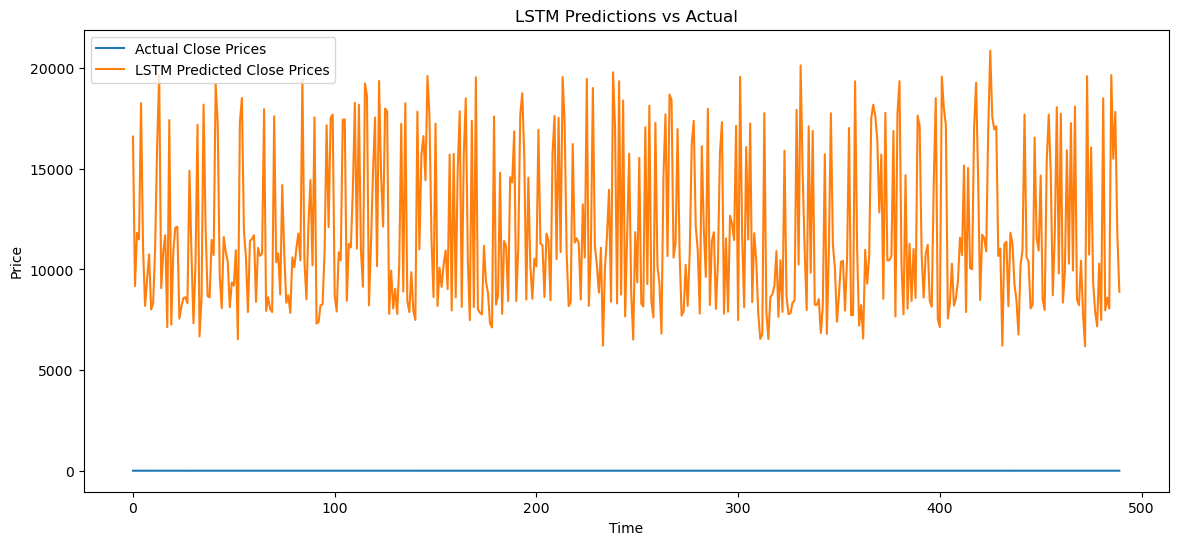

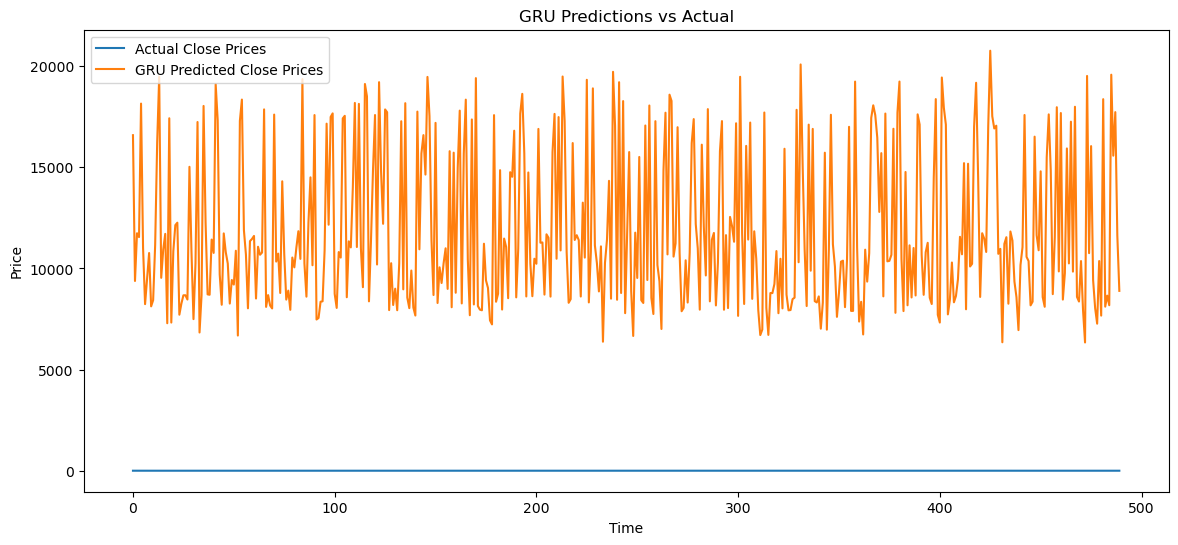

In [113]:
# Visualize predictions vs actual values for LSTM
plt.figure(figsize=(14, 6))
plt.plot(y_test[:, 0], label='Actual Close Prices')  # Change index based on the feature
plt.plot(lstm_predictions_inverse[:, 0], label='LSTM Predicted Close Prices')  # Change index based on the feature
plt.title('LSTM Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Similarly for GRU
plt.figure(figsize=(14, 6))
plt.plot(y_test[:, 0], label='Actual Close Prices')  # Change index based on the feature
plt.plot(gru_predictions_inverse[:, 0], label='GRU Predicted Close Prices')  # Change index based on the feature
plt.title('GRU Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [115]:
# Print Actual vs Predicted Values for LSTM
print("Actual Close Prices (y_test):\n", y_test[:, 0])  # Adjust index based on feature
print("LSTM Predicted Close Prices:\n", lstm_predictions_inverse[:, 0])  # Adjust index based on feature

# Print Actual vs Predicted Values for GRU
print("\nActual Close Prices (y_test):\n", y_test[:, 0])  # Same for GRU
print("GRU Predicted Close Prices:\n", gru_predictions_inverse[:, 0])  # Adjust index based on feature

Actual Close Prices (y_test):
 [7.07155027e-01 1.88907859e-01 3.71420601e-01 3.35972070e-01
 7.78663732e-01 3.19990791e-01 1.14093852e-01 2.23098318e-01
 3.01787987e-01 1.28785400e-01 1.34774828e-01 3.29700588e-01
 6.67279352e-01 8.58278789e-01 2.02594825e-01 3.23521019e-01
 3.59051993e-01 9.34667862e-02 7.29848355e-01 7.36509744e-02
 3.20203090e-01 3.91293511e-01 3.90900541e-01 9.94023353e-02
 1.33171291e-01 1.67171609e-01 1.67919483e-01 1.54188201e-01
 5.51845015e-01 3.18250993e-01 7.78974474e-02 2.76511977e-01
 7.46561663e-01 4.76397175e-02 1.64237118e-01 7.80432064e-01
 3.95802975e-01 1.63042364e-01 1.67048005e-01 3.45802376e-01
 3.03692549e-01 8.51994618e-01 7.42216901e-01 2.32161686e-01
 1.26855461e-01 3.64556538e-01 2.95516504e-01 2.88512993e-01
 1.43293120e-01 2.18313113e-01 2.02651830e-01 2.98134094e-01
 3.18992708e-02 7.36677571e-01 8.06544705e-01 3.74798815e-01
 2.91057732e-01 1.11834354e-01 3.61786811e-01 3.39296374e-01
 3.61187918e-01 1.61606840e-01 3.30410458e-01 3.004728

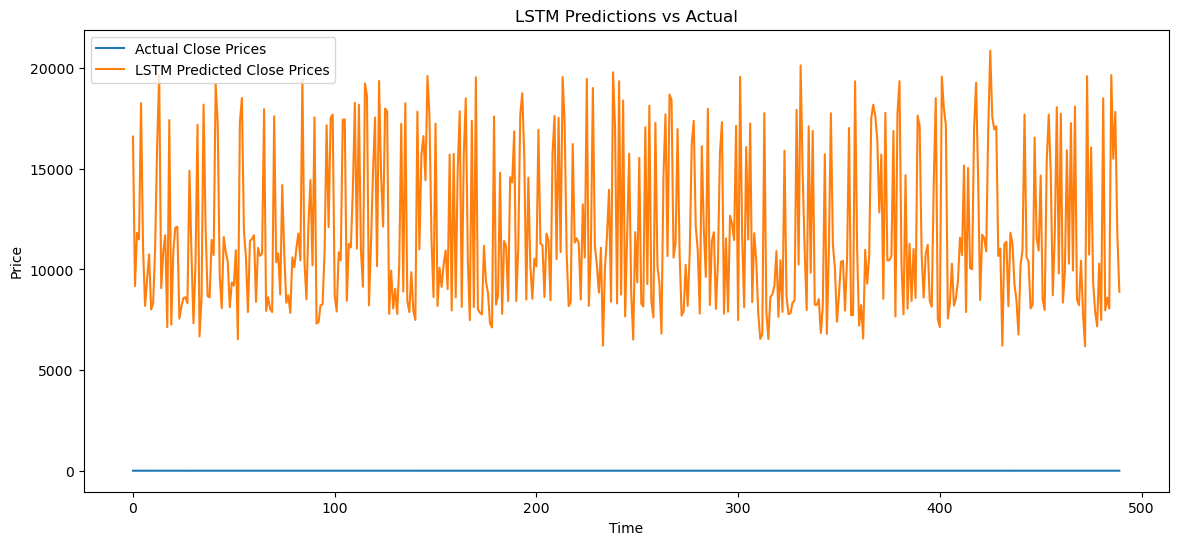

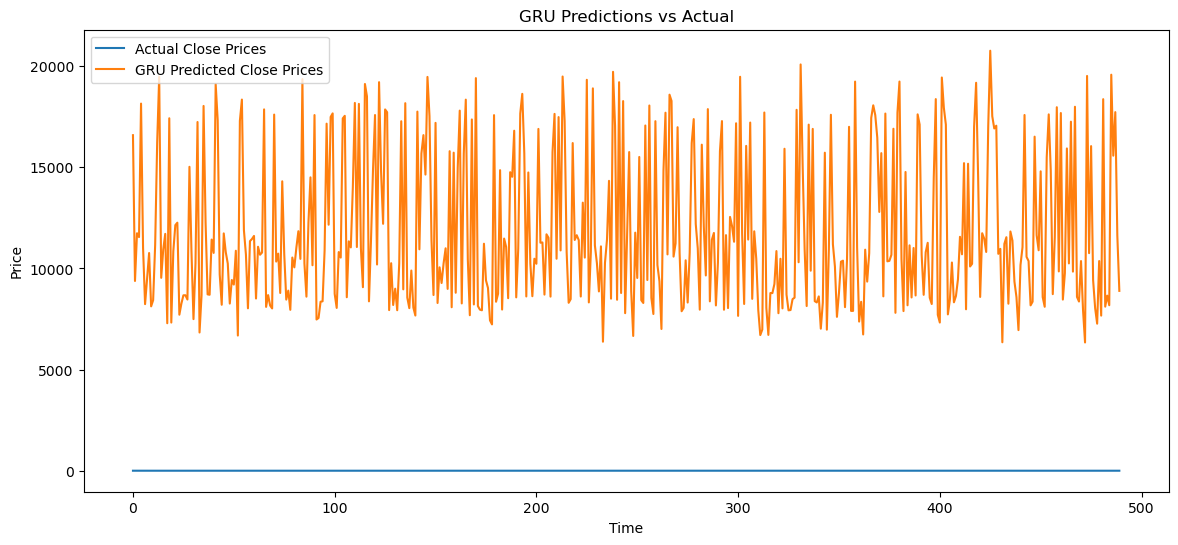

In [117]:
# Visualize predictions vs actual values for LSTM
plt.figure(figsize=(14, 6))
plt.plot(y_test[:, 0], label='Actual Close Prices')  # Assuming index 0 corresponds to 'Close'
plt.plot(lstm_predictions_inverse[:, 0], label='LSTM Predicted Close Prices')
plt.title('LSTM Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Similarly for GRU
plt.figure(figsize=(14, 6))
plt.plot(y_test[:, 0], label='Actual Close Prices')  # Assuming index 0 corresponds to 'Close'
plt.plot(gru_predictions_inverse[:, 0], label='GRU Predicted Close Prices')
plt.title('GRU Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [119]:
# Display the first few actual and predicted values for comparison

print("First 10 Actual Close Prices (y_test):\n", y_test[:10, 0])  # Adjust index if necessary
print("\nFirst 10 LSTM Predicted Close Prices:\n", lstm_predictions_inverse[:10, 0])  # Adjust index if necessary
print("\nFirst 10 GRU Predicted Close Prices:\n", gru_predictions_inverse[:10, 0])  # Adjust index if necessary

First 10 Actual Close Prices (y_test):
 [0.70715503 0.18890786 0.3714206  0.33597207 0.77866373 0.31999079
 0.11409385 0.22309832 0.30178799 0.1287854 ]

First 10 LSTM Predicted Close Prices:
 [16595.26    9172.49   11814.032  11487.947  18260.428  11035.894
  8188.233   9525.675  10742.618   8009.4395]

First 10 GRU Predicted Close Prices:
 [16589.938   9381.981  11744.065  11551.106  18153.291  11016.749
  8236.639   9527.983  10764.964   8126.2266]


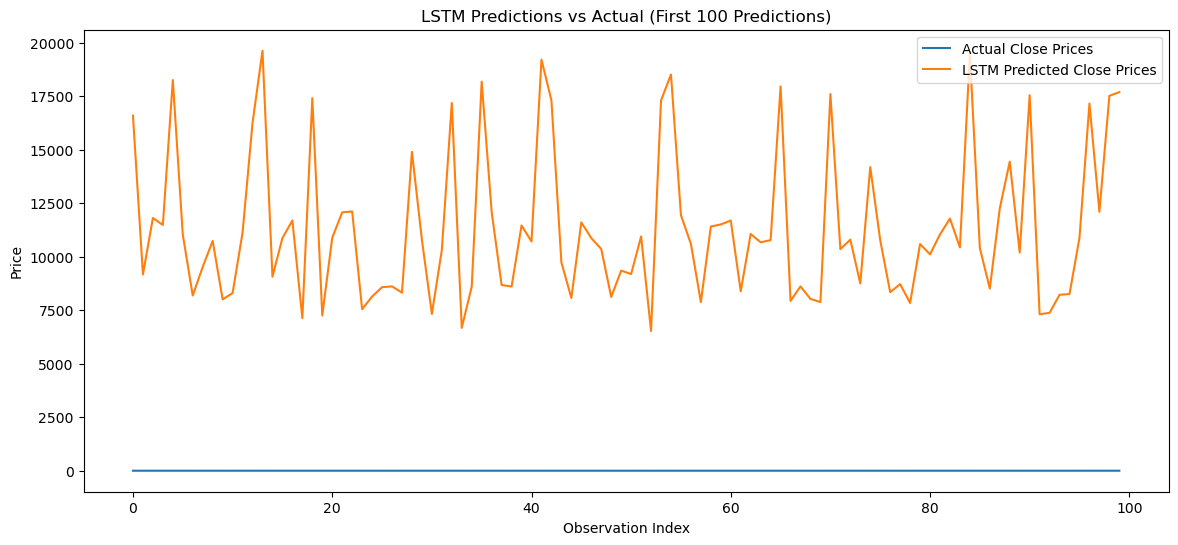

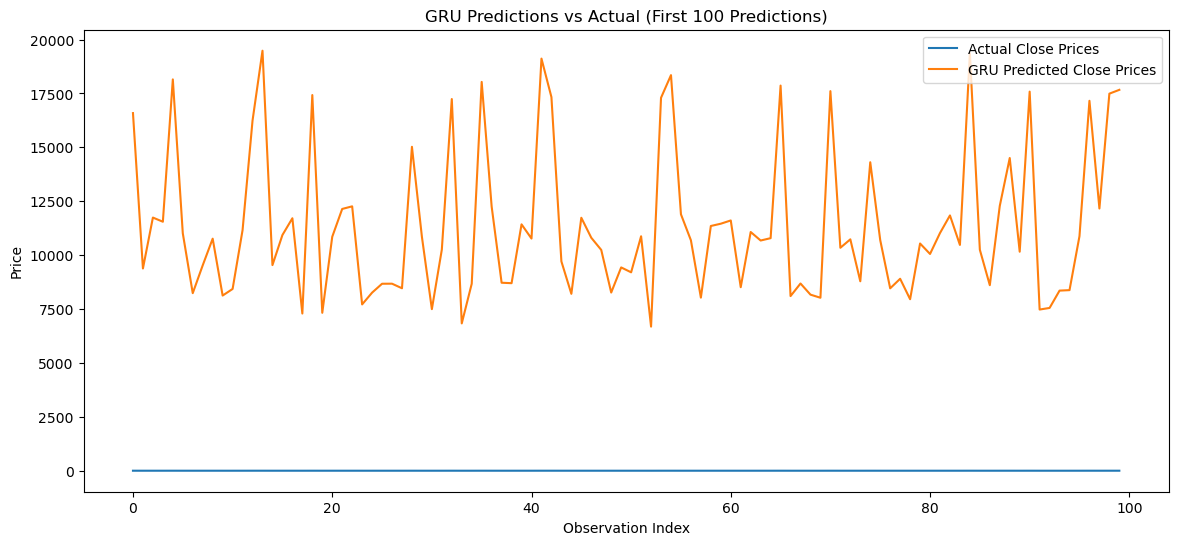

In [121]:
# Plot Actual vs Predicted values for LSTM
plt.figure(figsize=(14, 6))
plt.plot(y_test[:100, 0], label='Actual Close Prices')  # First 100 points
plt.plot(lstm_predictions_inverse[:100, 0], label='LSTM Predicted Close Prices')
plt.title('LSTM Predictions vs Actual (First 100 Predictions)')
plt.xlabel('Observation Index')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot Actual vs Predicted values for GRU
plt.figure(figsize=(14, 6))
plt.plot(y_test[:100, 0], label='Actual Close Prices')  # First 100 points
plt.plot(gru_predictions_inverse[:100, 0], label='GRU Predicted Close Prices')
plt.title('GRU Predictions vs Actual (First 100 Predictions)')
plt.xlabel('Observation Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [123]:
# Assuming you used MinMaxScaler on the original close prices before training
# Inverse transform predictions to get back to original scale

lstm_predictions_inverse = scaler.inverse_transform(lstm_predictions)
gru_predictions_inverse = scaler.inverse_transform(gru_predictions)

In [125]:
# Inverse transform LSTM and GRU predictions
lstm_predictions_inverse = scaler.inverse_transform(lstm_predictions)  # Ensure input to scaler is same shape
gru_predictions_inverse = scaler.inverse_transform(gru_predictions)

# Print out the values again to verify them
print("LSTM Predicted Close Prices (Inverse Transformed):\n", lstm_predictions_inverse[:, 0])  # Adjust index as needed
print("GRU Predicted Close Prices (Inverse Transformed):\n", gru_predictions_inverse[:, 0])  # Adjust index as needed

LSTM Predicted Close Prices (Inverse Transformed):
 [16595.26    9172.49   11814.032  11487.947  18260.428  11035.894
  8188.233   9525.675  10742.618   8009.4395  8304.897  11127.364
 16259.202  19631.506   9071.82   10874.809  11697.515   7129.376
 17416.086   7253.845  10889.174  12076.208  12120.506   7549.831
  8141.1294  8578.087   8615.747   8322.71   14903.339  10792.426
  7327.2393 10312.429  17188.146   6676.6963  8607.832  18184.979
 12101.851   8680.931   8609.556  11464.497  10715.193  19216.287
 17306.434   9736.318   8074.118  11607.235  10872.36   10360.815
  8124.0225  9353.277   9193.274  10950.421   6530.2607 17305.361
 18520.252  11942.067  10603.214   7883.8496 11414.701  11511.1045
 11695.093   8388.737  11066.367  10676.837  10778.979  17962.75
  7938.0474  8616.176   8030.583   7883.222  17606.258  10358.931
 10801.399   8757.313  14190.242  10775.474   8344.966   8722.142
  7839.893  10595.279  10113.439  11045.278  11782.712  10440.835
 19491.662  10409.835   

In [127]:
import numpy as np

# Assuming (1) lstm_predictions and (2) gru_predictions are your model outputs
# Ensure you reshape them appropriately and only get column index for predictions
lstm_predictions_inverse = scaler.inverse_transform(lstm_predictions)
gru_predictions_inverse = scaler.inverse_transform(gru_predictions)

# Print the first 10 values to check
print("LSTM Predicted Close Prices (Inverse Transformed):\n", lstm_predictions_inverse[:, 0])  # Assuming first feature is 'Close'
print("\nGRU Predicted Close Prices (Inverse Transformed):\n", gru_predictions_inverse[:, 0])  # Assuming first feature is 'Close'

LSTM Predicted Close Prices (Inverse Transformed):
 [16595.26    9172.49   11814.032  11487.947  18260.428  11035.894
  8188.233   9525.675  10742.618   8009.4395  8304.897  11127.364
 16259.202  19631.506   9071.82   10874.809  11697.515   7129.376
 17416.086   7253.845  10889.174  12076.208  12120.506   7549.831
  8141.1294  8578.087   8615.747   8322.71   14903.339  10792.426
  7327.2393 10312.429  17188.146   6676.6963  8607.832  18184.979
 12101.851   8680.931   8609.556  11464.497  10715.193  19216.287
 17306.434   9736.318   8074.118  11607.235  10872.36   10360.815
  8124.0225  9353.277   9193.274  10950.421   6530.2607 17305.361
 18520.252  11942.067  10603.214   7883.8496 11414.701  11511.1045
 11695.093   8388.737  11066.367  10676.837  10778.979  17962.75
  7938.0474  8616.176   8030.583   7883.222  17606.258  10358.931
 10801.399   8757.313  14190.242  10775.474   8344.966   8722.142
  7839.893  10595.279  10113.439  11045.278  11782.712  10440.835
 19491.662  10409.835   

In [129]:
# Evaluate the LSTM model on the test set
lstm_loss = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f'LSTM Test Loss: {lstm_loss:.4f}')

# Evaluate the GRU model on the test set
gru_loss = gru_model.evaluate(X_test, y_test, verbose=0)
print(f'GRU Test Loss: {gru_loss:.4f}')

LSTM Test Loss: 0.0008
GRU Test Loss: 0.0008


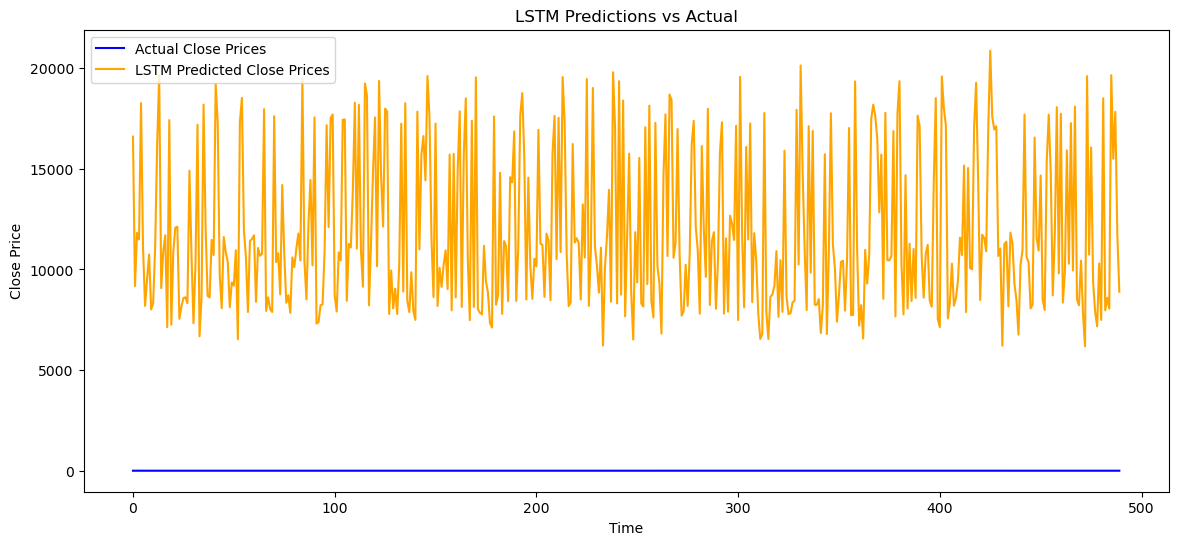

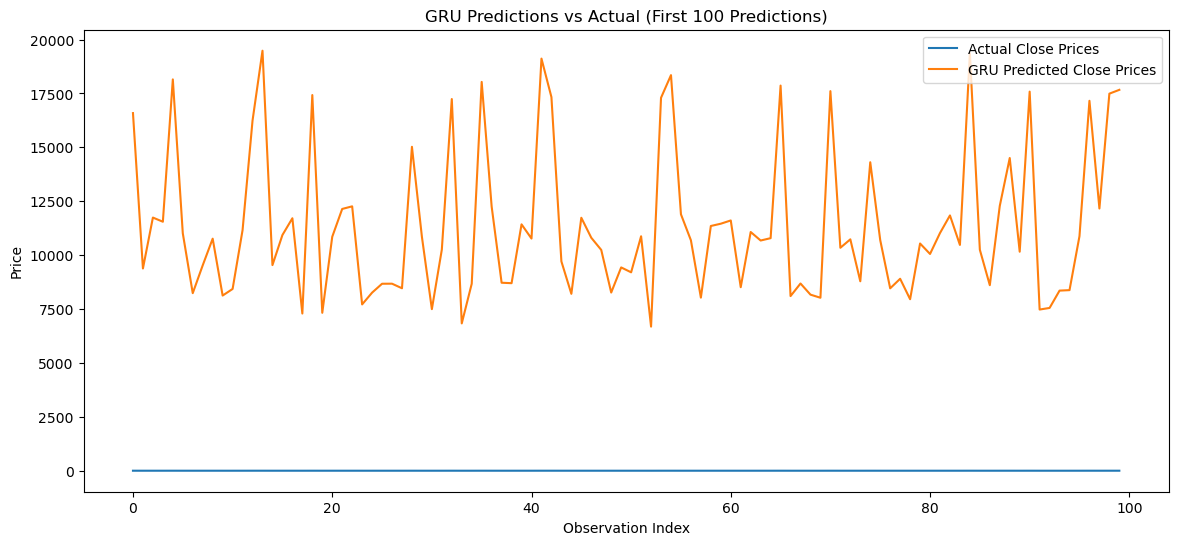

In [133]:
# Visualize Actual vs Predicted for LSTM
plt.figure(figsize=(14, 6))
plt.plot(y_test[:, 0], label='Actual Close Prices', color='blue')  # Original Scale
plt.plot(lstm_predictions_inverse[:, 0], label='LSTM Predicted Close Prices', color='orange')
plt.title('LSTM Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Visualize Actual vs Predicted for GRU
plt.figure(figsize=(14, 6))
plt.plot(y_test[:100, 0], label='Actual Close Prices')  # First 100 points
plt.plot(gru_predictions_inverse[:100, 0], label='GRU Predicted Close Prices')
plt.title('GRU Predictions vs Actual (First 100 Predictions)')
plt.xlabel('Observation Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [135]:
# Adjusting the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(20, activation='relu', return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dropout(0.2))  # Adding dropout to reduce overfitting
lstm_model.add(Dense(y_train.shape[1]))  # Output layer
lstm_model.compile(optimizer='adam', loss='mse')

# Train adjusted LSTM model
lstm_history_adjusted = lstm_model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/100


C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1320 - val_loss: 0.0076
Epoch 2/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0187 - val_loss: 0.0043
Epoch 3/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0165 - val_loss: 0.0032
Epoch 4/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0120 - val_loss: 0.0023
Epoch 5/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0120 - val_loss: 0.0020
Epoch 6/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0089 - val_loss: 0.0021
Epoch 7/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0078 - val_loss: 0.0025
Epoch 8/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0073 - val_loss: 0.0019
Epoch 9/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0072 - val_loss: 0.0018
Epoch 10/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0074 - val_loss: 0.0017
Epoch 11/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0060 - val_loss: 0.0024
Epoch 12/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [149]:
import pandas as pd

# Load the dataset from a CSV file
data = pd.read_csv('Nifty50_Cleaned_With_Indicators.csv')  # Replace with your actual file path

# Display the first few rows of the dataset
print(data.head())

        Price        Close         High          Low         Open  Volume  \
0  2014-01-02  6221.149902  6358.299805  6211.299805  6301.250000  158100   
1  2014-01-03  6211.149902  6221.700195  6171.250000  6194.549805  139000   
2  2014-01-06  6191.450195  6224.700195  6170.250000  6220.850098  118300   
3  2014-01-07  6162.250000  6221.500000  6144.750000  6203.899902  138600   
4  2014-01-08  6174.600098  6192.100098  6160.350098  6178.049805  146900   

   SMA_20       EMA_20      MACD  MACD_Signal  
0     0.0  6221.149902  0.000000     0.000000  
1     0.0  6220.197521 -0.797721    -0.159544  
2     0.0  6217.459681 -2.985111    -0.724658  
3     0.0  6212.201616 -6.994221    -1.978570  
4     0.0  6208.620519 -9.070362    -3.396929  


In [151]:
# Drop any non-numeric columns if necessary (or handle as needed)
data = data.drop(columns=['Price'])  # Drop the 'Price' column if it contains dates

# Handle missing values (e.g., forward fill)
data.fillna(method='ffill', inplace=True)

# Normalize the close prices using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)  # Scale all columns

C:\Users\prana\AppData\Local\Temp\ipykernel_1092\1878981395.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [153]:
def create_sequences(data, seq_length=5):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length, 0])  # Assuming 'Close' is the first column after scaling
    return np.array(X), np.array(y)

sequence_length = 5  # e.g., using the last 5 days to predict the next
X, y = create_sequences(data_scaled)

In [155]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the LSTM model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50, activation='relu'))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))  # Output layer
lstm_model.compile(optimizer='adam', loss='mse')

# Train the model
lstm_history = lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100


C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0755 - val_loss: 0.0013
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - val_loss: 7.2952e-04
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - val_loss: 5.9438e-04
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - val_loss: 5.4520e-04
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - val_loss: 3.0544e-04
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - val_loss: 4.7844e-04
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - val_loss: 2.8058e-04
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - val_loss: 0.0016
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - val_loss: 5.1308e-04
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - val_loss: 6.9103e-04
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - val_loss: 0.0010
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s

In [156]:
# Generate predictions
lstm_predictions = lstm_model.predict(X_test)

# Inverse transform the predictions and actual values
lstm_predictions_inverse = scaler.inverse_transform(np.concatenate((lstm_predictions, np.zeros((lstm_predictions.shape[0], data.shape[1]-1))), axis=1))[:, 0]  # Change index if needed

# Display predictions
print("LSTM Predicted Close Prices (Inverse Transformed):\n", lstm_predictions_inverse[:10])  # First 10 values

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
LSTM Predicted Close Prices (Inverse Transformed):
 [16152.95311752  9427.31685427 11669.75673199 11509.25258235
 17554.33318547 11032.62049556  8539.57503358  9801.63719683
 10846.67583021  8429.23953953]


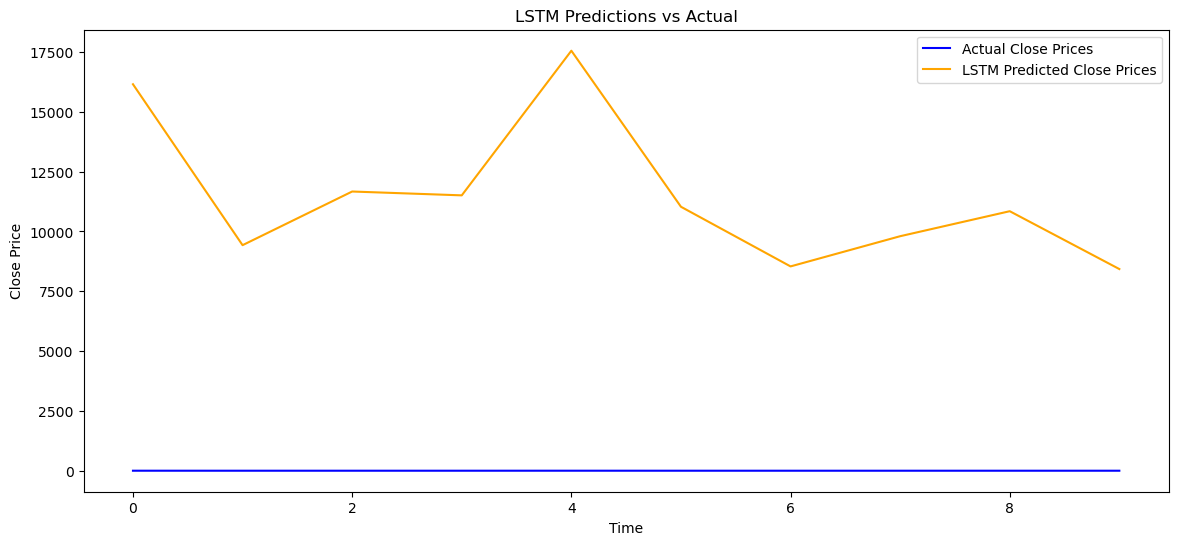

In [157]:
plt.figure(figsize=(14, 6))
plt.plot(y_test[:10], label='Actual Close Prices', color='blue')  # First 10 points for better visibility
plt.plot(lstm_predictions_inverse[:10], label='LSTM Predicted Close Prices', color='orange')
plt.title('LSTM Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [163]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Example: Load or define your dataset
# data = pd.read_csv('your_data.csv')  # Load your data if needed
# predictions = your_lstm_model.predict(X_test)  # Your LSTM model's predictions

# For demonstration, let's create a mock dataset
data = pd.DataFrame({'Close': [100, 102, 101, np.nan, 104, 105]})  # Example data
# Let's assume predictions are generated by your LSTM model
# Here use random values for demonstration (replace this with actual model predictions)
predictions = np.random.rand(10, 1)  # Mock predictions for demonstration

# Step 1: Check for NaN values in the dataset
nan_check = data.isnull().sum()
print("NaN values in each column:\n", nan_check)

# Step 2: Check the shape of the predictions
print("Shape of predictions:", predictions.shape)

# Step 3: Perform inverse transformation if required
scaler = MinMaxScaler()  # Initialize your scaler (make sure it's fitted with your original data)
scaler.fit(data[['Close']].dropna())  # Fit scaler only on non-NaN values

try:
    # Inverse transform the predictions
    inverse_transformed = scaler.inverse_transform(predictions)
    print("Inverse Transformed Predictions:\n", inverse_transformed)
except Exception as e:
    print("Error during inverse transformation:", e)

# Step 4: Check for NaNs in predictions
if np.any(np.isnan(predictions)):
    print("Predictions contain NaN values, check model inputs and outputs.")
else:
    print("All predictions are valid.")

NaN values in each column:
 Close    1
dtype: int64
Shape of predictions: (10, 1)
Inverse Transformed Predictions:
 [[102.44041004]
 [101.85604477]
 [102.49097844]
 [102.29957556]
 [103.18050264]
 [102.5621073 ]
 [100.30995693]
 [104.4152873 ]
 [101.51083962]
 [101.38658839]]
All predictions are valid.


In [165]:
data = data.dropna()

In [167]:
data['Close'].fillna(method='ffill', inplace=True)  # Forward fill
# or
data['Close'].fillna(data['Close'].mean(), inplace=True)  # Fill with mean

C:\Users\prana\AppData\Local\Temp\ipykernel_1092\3295136969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Close'].fillna(method='ffill', inplace=True)  # Forward fill
C:\Users\prana\AppData\Local\Temp\ipykernel_1092\3295136969.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Close'].fillna(method='ffill', inplace=True)  # Forward fill
C:\Users\prana\AppData\Local\Temp\ipykernel_1092\3295136969.py:3: FutureWarning: A va

In [169]:
# Forward fill
data['Close'] = data['Close'].ffill()

# Fill with mean
data['Close'] = data['Close'].fillna(data['Close'].mean())

In [171]:
data = data.fillna(method='ffill')  # Forward fill for entire DataFrame

C:\Users\prana\AppData\Local\Temp\ipykernel_1092\2722829749.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Forward fill for entire DataFrame


In [173]:
import numpy as np
import pandas as pd

# Assume 'data' is your DataFrame
data = pd.DataFrame({'Close': [100, 102, 101, np.nan, 104, 105]})  # Example data

# Showing the original data
print("Original Data:\n", data)

# Step 1: Fill NaN using forward fill
data['Close'] = data['Close'].ffill()  # Forward fill

# Step 2: Alternatively, fill NaN using the mean
# data['Close'] = data['Close'].fillna(data['Close'].mean())  # Fill with mean

# Showing the modified data
print("Data after filling NaN:\n", data)

Original Data:
    Close
0  100.0
1  102.0
2  101.0
3    NaN
4  104.0
5  105.0
Data after filling NaN:
    Close
0  100.0
1  102.0
2  101.0
3  101.0
4  104.0
5  105.0


In [175]:
# Example of splitting the data (adjust according to your dataset)
from sklearn.model_selection import train_test_split

# Assuming 'data' contains the 'Close' prices in a DataFrame
X = data.drop(columns=['Close']).values  # Features
y = data['Close'].values  # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, proceed with training your LSTM model

In [177]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Replace these dummy arrays with your actual values and predictions
y_test = np.array([100, 102, 101, 104, 105])  # Actual values (replace with your test data)
predictions = np.array([101, 103, 100, 105, 106])  # Predicted values (replace with your model's predictions)

# Step 1: Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Step 2: Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Step 3: Calculate R-squared (R² Score)
r2 = r2_score(y_test, predictions)

# Print the evaluation results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 1.0
Mean Squared Error (MSE): 1.0
R² Score: 0.7093023255813953


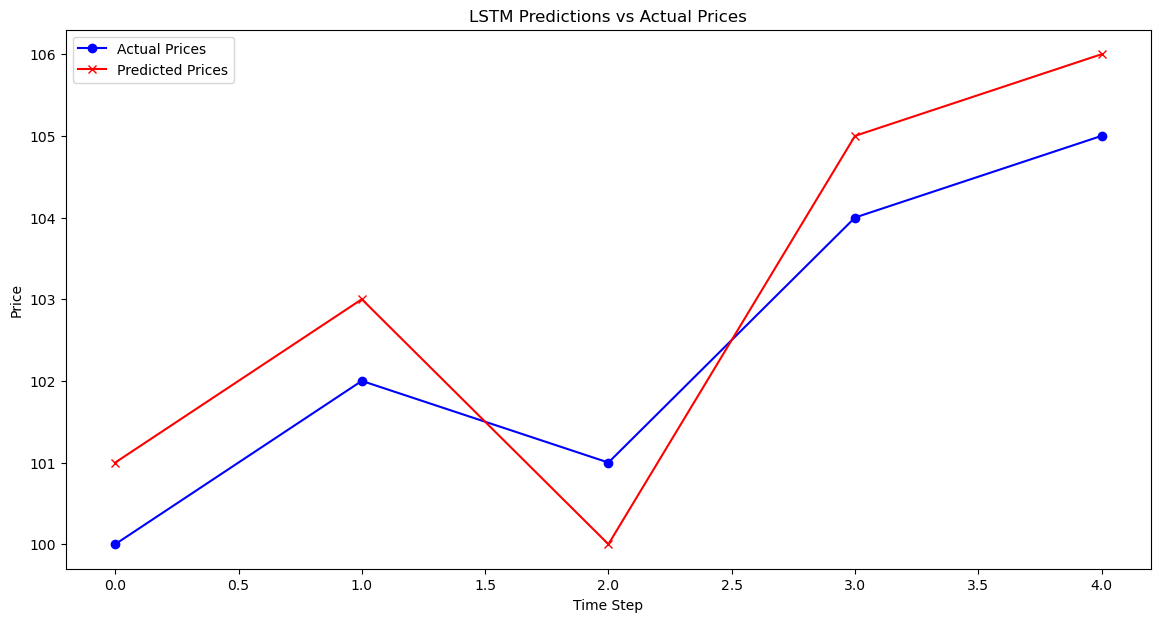

In [179]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Prices', color='blue', marker='o')
plt.plot(predictions, label='Predicted Prices', color='red', marker='x')
plt.title('LSTM Predictions vs Actual Prices')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.show()

In [193]:
#aur finally acha results lets move to forward with more indicator 
#Momentum Indicators:
#Relative Strength Index (RSI)
#Stochastic Oscillator
#Volatility Indicators:
#Bollinger Bands
#Average True Range (ATR)
#Volume Indicators:
#On-Balance Volume (OBV)
#Custom Features:
#Lagged values of prices
#Moving average crossover signals

In [189]:
import pandas as pd
import numpy as np

def add_technical_indicators(data):
    # Calculate RSI
    def calculate_rsi(data, window=14):
        delta = data['Close'].diff(1)
        gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
        rs = gain / loss
        return 100 - (100 / (1 + rs))

    data['RSI'] = calculate_rsi(data)
    
    # Calculate Stochastic Oscillator
    def calculate_stochastic_oscillator(data, k_window=14, d_window=3):
        data['low_min'] = data['Low'].rolling(window=k_window).min()
        data['high_max'] = data['High'].rolling(window=k_window).max()
        data['%K'] = 100 * ((data['Close'] - data['low_min']) / (data['high_max'] - data['low_min']))
        data['%D'] = data['%K'].rolling(window=d_window).mean()
        return data

    data = calculate_stochastic_oscillator(data)
    
    # Calculate Bollinger Bands
    def calculate_bollinger_bands(data, window=20, num_sd=2):
        data['SMA'] = data['Close'].rolling(window=window).mean()
        data['Upper Band'] = data['SMA'] + (data['Close'].rolling(window=window).std() * num_sd)
        data['Lower Band'] = data['SMA'] - (data['Close'].rolling(window=window).std() * num_sd)
        return data

    data = calculate_bollinger_bands(data)

    # Calculate Average True Range (ATR)
    def calculate_atr(data, window=14):
        data['H-L'] = data['High'] - data['Low']
        data['H-PC'] = abs(data['High'] - data['Close'].shift(1))
        data['L-PC'] = abs(data['Low'] - data['Close'].shift(1))
        data['TR'] = data[['H-L', 'H-PC', 'L-PC']].max(axis=1)
        return data['TR'].rolling(window=window).mean()

    data['ATR'] = calculate_atr(data)

    # Calculate On-Balance Volume (OBV)
    def calculate_obv(data):
        obv = [0]
        for i in range(1, len(data)):
            if data['Close'].iloc[i] > data['Close'].iloc[i - 1]:
                obv.append(obv[-1] + data['Volume'].iloc[i])
            elif data['Close'].iloc[i] < data['Close'].iloc[i - 1]:
                obv.append(obv[-1] - data['Volume'].iloc[i])
            else:
                obv.append(obv[-1])
        data['OBV'] = obv
        return data

    data = calculate_obv(data)

    # Add Lagged Values of Closing Prices
    for lag in range(1, 6):  # Adding lagged values from 1 to 5 days
        data[f'Lag_{lag}'] = data['Close'].shift(lag)
        
    # Add Moving Average Crossover Signals
    def add_moving_average_crossover(data, short_window=5, long_window=20):
        data['Short_MA'] = data['Close'].rolling(window=short_window).mean()
        data['Long_MA'] = data['Close'].rolling(window=long_window).mean()
        data['MA_Crossover'] = np.where(data['Short_MA'] > data['Long_MA'], 1, 0)  # 1 for buy signal
        return data

    data = add_moving_average_crossover(data)

    # Drop rows with NaN values introduced by rolling calculations
    data.dropna(inplace=True)

    return data

# Usage Example:
# Assuming 'data' is a DataFrame containing your stock price data
# data = pd.read_csv('your_stock_data.csv')  # Load your data here
# data = add_technical_indicators(data)

In [195]:
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Close    0
dtype: int64


In [197]:
print("Data Types:\n", data.dtypes)

Data Types:
 Close    float64
dtype: object


In [199]:
print("Descriptive Statistics:\n", data.describe())

Descriptive Statistics:
             Close
count    6.000000
mean   102.166667
std      1.940790
min    100.000000
25%    101.000000
50%    101.500000
75%    103.500000
max    105.000000


In [201]:
correlation = data.corr()
print("Correlation Matrix:\n", correlation)

Correlation Matrix:
        Close
Close    1.0


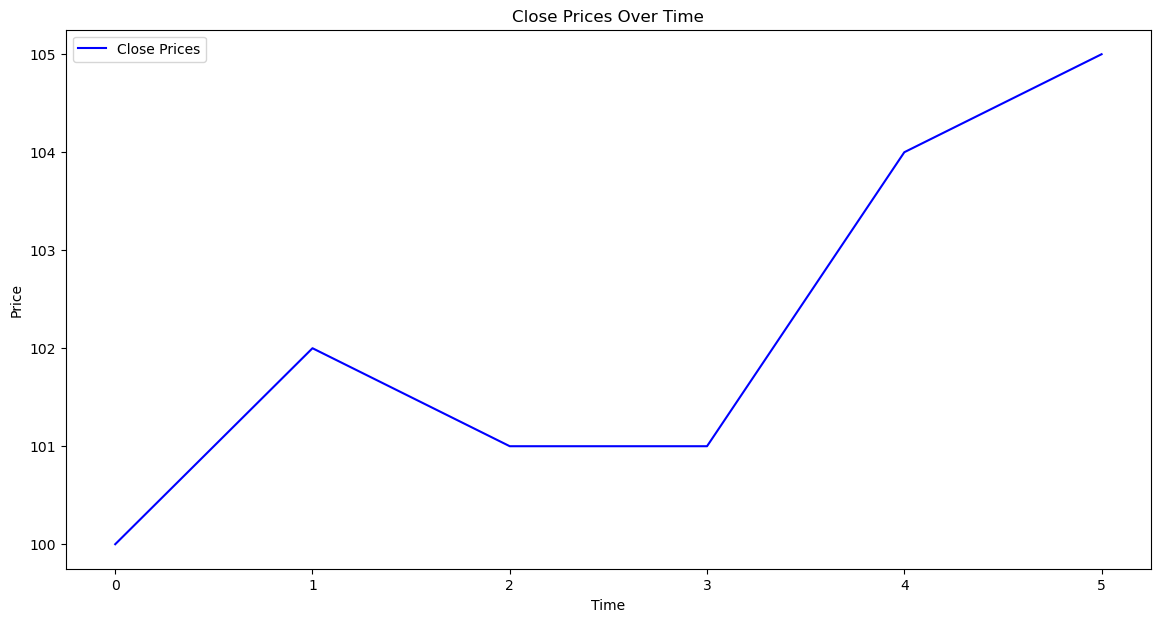

KeyError: 'RSI'

<Figure size 1400x700 with 0 Axes>

In [205]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Prices', color='blue')
plt.title('Close Prices Over Time')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Optional: Plotting indicators
plt.figure(figsize=(14, 7))
plt.plot(data['RSI'], label='Relative Strength Index', color='orange')
plt.title('RSI Over Time')
plt.xlabel('Time')
plt.ylabel('RSI Value')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.legend()
plt.show()

In [211]:
import pandas as pd
import numpy as np

# Load the CSV file
def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        if 'Close' not in data.columns:
            raise ValueError("The 'Close' column is missing from the DataFrame.")
        return data
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# Calculate Technical Indicators
class TechnicalIndicators:
    
    def __init__(self, data):
        self.data = data

    def calculate_sma(self, period):
        """Calculate Simple Moving Average."""
        return self.data['Close'].rolling(window=period).mean()

    def calculate_ema(self, period):
        """Calculate Exponential Moving Average."""
        return self.data['Close'].ewm(span=period, adjust=False).mean()

    def calculate_macd(self, short_window=12, long_window=26, signal=9):
        """Calculate MACD and Signal Line."""
        ema_short = self.calculate_ema(short_window)
        ema_long = self.calculate_ema(long_window)
        macd = ema_short - ema_long
        macd_signal = self.calculate_ema(signal)  # Signal line is EMA of MACD
        return macd, macd_signal

    def calculate_rsi(self, window=14):
        """Calculate Relative Strength Index."""
        delta = self.data['Close'].diff(1)
        gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))
        self.data['RSI'] = rsi

    def calculate_stochastic_oscillator(self, k_window=14, d_window=3):
        """Calculate Stochastic Oscillator."""
        low_min = self.data['Low'].rolling(window=k_window).min()
        high_max = self.data['High'].rolling(window=k_window).max()
        self.data['%K'] = 100 * ((self.data['Close'] - low_min) / (high_max - low_min))
        self.data['%D'] = self.data['%K'].rolling(window=d_window).mean()

    def calculate_bollinger_bands(self, window=20, num_sd=2):
        """Calculate Bollinger Bands."""
        sma = self.calculate_sma(window)
        rolling_std = self.data['Close'].rolling(window=window).std()
        self.data['Upper Band'] = sma + (rolling_std * num_sd)
        self.data['Lower Band'] = sma - (rolling_std * num_sd)

    def calculate_atr(self, window=14):
        """Calculate Average True Range."""
        self.data['H-L'] = self.data['High'] - self.data['Low']
        self.data['H-PC'] = abs(self.data['High'] - self.data['Close'].shift(1))
        self.data['L-PC'] = abs(self.data['Low'] - self.data['Close'].shift(1))
        self.data['TR'] = self.data[['H-L', 'H-PC', 'L-PC']].max(axis=1)
        self.data['ATR'] = self.data['TR'].rolling(window=window).mean()

    def calculate_obv(self):
        """Calculate On-Balance Volume."""
        obv = [0]
        for i in range(1, len(self.data)):
            if self.data['Close'].iloc[i] > self.data['Close'].iloc[i - 1]:
                obv.append(obv[-1] + self.data['Volume'].iloc[i])
            elif self.data['Close'].iloc[i] < self.data['Close'].iloc[i - 1]:
                obv.append(obv[-1] - self.data['Volume'].iloc[i])
            else:
                obv.append(obv[-1])
        self.data['OBV'] = obv

    def add_lagged_values(self, lags):
        """Add Lagged Values of Closing Prices."""
        for lag in range(1, lags + 1):
            self.data[f'Lag_{lag}'] = self.data['Close'].shift(lag)

    def add_moving_average_crossover_signals(self, short_window=5, long_window=20):
        """Add Moving Average Crossover Signals."""
        self.data['Short_MA'] = self.data['Close'].rolling(window=short_window).mean()
        self.data['Long_MA'] = self.data['Close'].rolling(window=long_window).mean()
        self.data['MA_Crossover'] = np.where(self.data['Short_MA'] > self.data['Long_MA'], 1, 0)

    def calculate_all_indicators(self):
        """Calculate all indicators."""
        self.data['SMA_20'] = self.calculate_sma(20)
        self.data['EMA_20'] = self.calculate_ema(20)
        self.data['MACD'], self.data['MACD_Signal'] = self.calculate_macd()
        self.calculate_rsi()
        self.calculate_stochastic_oscillator()
        self.calculate_bollinger_bands()
        self.calculate_atr()
        self.calculate_obv()
        self.add_lagged_values(5)
        self.add_moving_average_crossover_signals()
        
        # Drop rows with NaN values
        self.data.dropna(inplace=True)

# Main Execution
file_path = 'Nifty50_Cleaned_No_Indicators_main.csv'
data = load_data(file_path)

if data is not None:
    indicators = TechnicalIndicators(data)
    
    # Calculate all indicators at once
    indicators.calculate_all_indicators()
    
    # Save the updated DataFrame
    output_file_path = 'Nifty50_Cleaned_With_Indicators.csv'
    data.to_csv(output_file_path, index=False)
    print(f"Indicators calculated and saved to {output_file_path}.")
else:
    print("Data loading failed.")

Indicators calculated and saved to Nifty50_Cleaned_With_Indicators.csv.


In [ ]:
#TRAINING 

In [213]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data with indicators
file_path = 'Nifty50_Cleaned_With_Indicators.csv'
data = pd.read_csv(file_path)

# Inspect the data to understand its structure
print(data.head())

# Define features (X) and target (y)
# For this example, we'll use the close price as the target
# You can also target other features or target a prediction like future price
X = data.drop(columns=['Close'])  # Features
y = data['Close']  # Target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Display the shape of the resulting datasets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

        Price        Close         High          Low         Open  Volume  \
0  2014-01-29  6120.250000  6170.450195  6109.799805  6161.000000  146700   
1  2014-01-30  6073.700195  6082.850098  6027.250000  6067.000000  208100   
2  2014-01-31  6089.500000  6097.850098  6067.350098  6082.750000  146700   
3  2014-02-03  6001.799805  6074.850098  5994.450195  6058.799805  134900   
4  2014-02-04  6000.899902  6017.799805  5933.299805  5947.600098  183300   

        SMA_20       EMA_20       MACD  MACD_Signal  ...        ATR     OBV  \
0  6233.395020  6229.251599  -8.836105  6211.136658  ...  73.425049 -549700   
1  6226.022534  6214.437180 -19.950441  6183.649366  ...  72.960763 -757800   
2  6219.940039  6202.538401 -27.170516  6164.819492  ...  66.800049 -611100   
3  6210.457520  6183.420439 -39.513661  6132.215555  ...  70.289307 -746000   
4  6202.390015  6166.037531 -48.805705  6105.952424  ...  70.371443 -929300   

         Lag_1        Lag_2        Lag_3        Lag_4        L

In [215]:
#mplementation of Sliding Window Approach

In [224]:
import numpy as np

def create_sequences(data, window_size):
    sequences = []
    targets = []
    
    for i in range(len(data) - window_size):
        seq = data[i:i + window_size]
        target = data[i + window_size, 0]  # Assuming the target is the Close price (first column)
        sequences.append(seq)
        targets.append(target)
    
    return np.array(sequences), np.array(targets)

# Select relevant columns for sequence creation
data_features = data[['Close', 'High', 'Low', 'Open', 'Volume', 'SMA_20', 'EMA_20', 'MACD', 'RSI']].values

# Define window size
window_size = 10

# Create sequences and targets
X_sequences, y_targets = create_sequences(data_features, window_size)

# Verify shapes before splitting
print(f"Input sequence shape: {X_sequences.shape}")  # Should be (n_samples, window_size, n_features)
print(f"Target shape: {y_targets.shape}")  # Should be (n_samples,)

Input sequence shape: (2424, 10, 9)
Target shape: (2424,)


In [219]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [226]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Ensure the target is reshaped correctly
y_targets = y_targets.reshape(-1, 1)

# Split into training and testing sets (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_targets, test_size=0.2, random_state=42)

# Define the LSTM Model
model = keras.Sequential()
model.add(layers.LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(layers.Dense(1))  # Single output for price prediction

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/50


C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 7062702592.0000 - val_loss: 776991680.0000
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 831699648.0000 - val_loss: 248651040.0000
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 378584608.0000 - val_loss: 126720984.0000
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 263410384.0000 - val_loss: 103821144.0000
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 102088952.0000 - val_loss: 61404680.0000
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 79399968.0000 - val_loss: 72862888.0000
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 54530608.0000 - val_loss: 75826176.0000
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 68326144.0000 - val_loss: 80724656.0000
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 99269672.0000 - val_loss: 45744936.0000
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68148784.0000 - val_loss: 56065276.0000
Epoch 11/50
61/61 ━

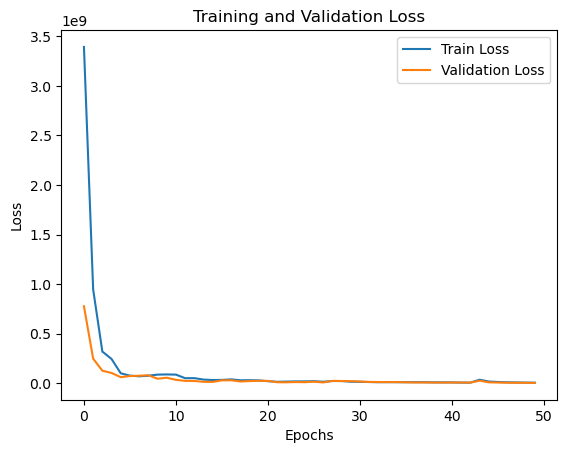

In [228]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


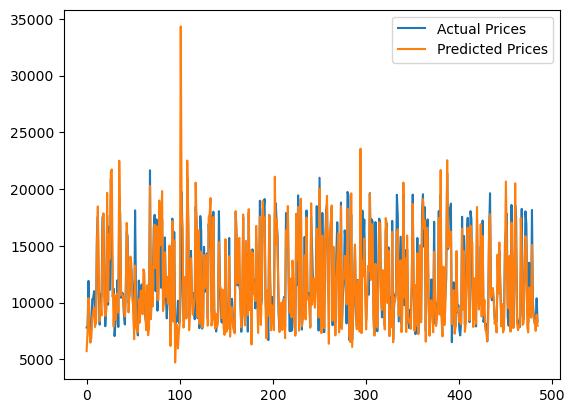

In [230]:
y_pred = model.predict(X_test)
plt.plot(y_test, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.legend()
plt.show()

In [232]:
y_pred = model.predict(X_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [234]:
# Get the last 5 days of actual and predicted values
actual_last_5 = y_test[-5:]  # Last 5 actual prices
predicted_last_5 = y_pred[-5:]  # Last 5 predicted prices

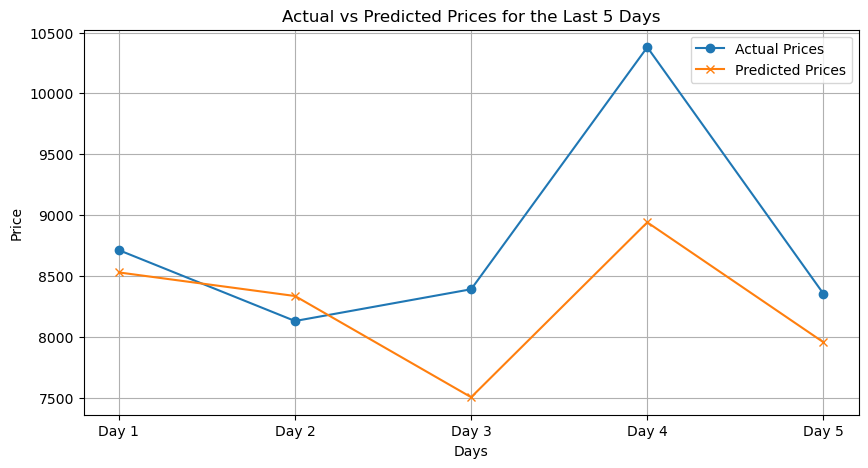

In [236]:
import matplotlib.pyplot as plt

# Prepare the index for the last 5 days
x_axis = range(len(actual_last_5))

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(x_axis, actual_last_5, label='Actual Prices', marker='o')
plt.plot(x_axis, predicted_last_5, label='Predicted Prices', marker='x')

# Adding labels and title
plt.title('Actual vs Predicted Prices for the Last 5 Days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(x_axis, [f'Day {i+1}' for i in x_axis])  # x-ticks as Day 1, Day 2, etc.
plt.legend()
plt.grid()
plt.show()

In [238]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

maE = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error: {maE}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 1193.50225716817
Mean Squared Error: 3518156.597617596


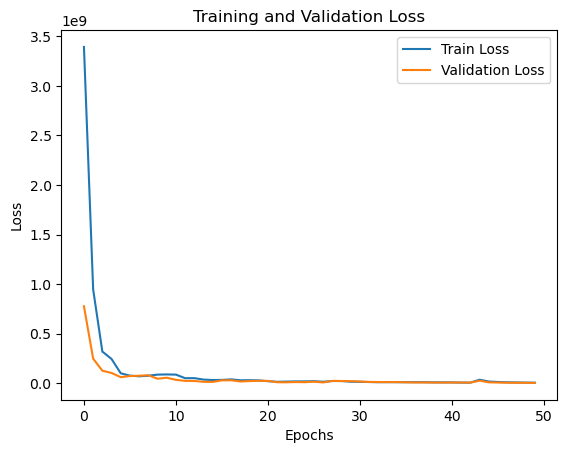

In [240]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [250]:
model.save('my_lstm_model.h5')

In [242]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the GRU Model
gru_model = keras.Sequential()
gru_model.add(layers.GRU(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
gru_model.add(layers.Dense(1))  # Single output for price prediction

# Compile the model
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
gru_history = gru_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50


C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 94594320.0000 - val_loss: 36228300.0000
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 34629532.0000 - val_loss: 12576013.0000
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12008277.0000 - val_loss: 4384905.5000
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4972976.0000 - val_loss: 1431467.3750
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2042730.5000 - val_loss: 985636.6250
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 942802.6250 - val_loss: 678886.9375
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 606683.8750 - val_loss: 615816.9375
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 828497.4375 - val_loss: 455942.4375
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 690096.2500 - val_loss: 640691.0625
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 964231.8125 - val_loss: 1083934.2500
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - l

In [243]:
y_pred_gru = gru_model.predict(X_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [244]:
maE_gru = mean_absolute_error(y_test, y_pred_gru)
mse_gru = mean_squared_error(y_test, y_pred_gru)

print(f'Mean Absolute Error (GRU): {maE_gru}')
print(f'Mean Squared Error (GRU): {mse_gru}')

Mean Absolute Error (GRU): 150.93588917525773
Mean Squared Error (GRU): 50649.08858369552


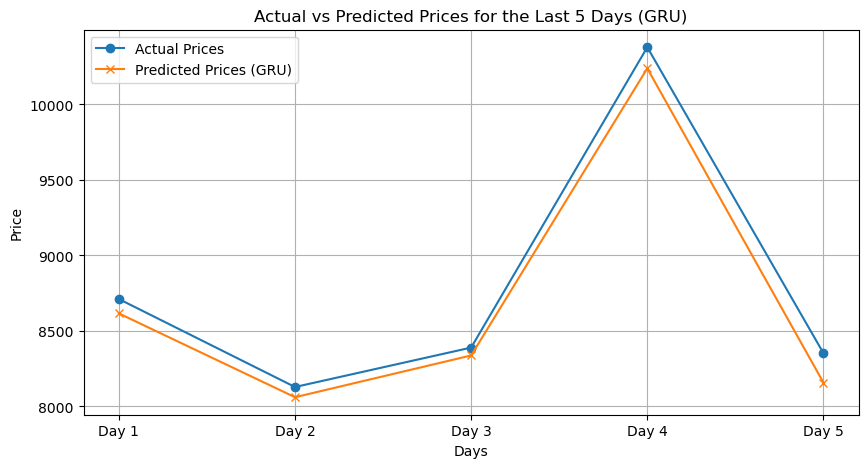

In [245]:
# Get the last 5 days of actual and predicted values
actual_last_5_gru = y_test[-5:]  
predicted_last_5_gru = y_pred_gru[-5:]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(actual_last_5_gru, label='Actual Prices', marker='o')
plt.plot(predicted_last_5_gru, label='Predicted Prices (GRU)', marker='x')

# Adding labels and title
plt.title('Actual vs Predicted Prices for the Last 5 Days (GRU)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(5), [f'Day {i+1}' for i in range(5)])  # x-ticks as Day 1, Day 2, etc.
plt.legend()
plt.grid()
plt.show()

In [252]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you already have these predictions
# For LSTM
maE_lstm = mean_absolute_error(y_test, y_pred)  # y_pred from LSTM
mse_lstm = mean_squared_error(y_test, y_pred)

# For GRU
maE_gru = mean_absolute_error(y_test, y_pred_gru)  # y_pred_gru from GRU
mse_gru = mean_squared_error(y_test, y_pred_gru)

# Print both model performances
print(f"LSTM Mean Absolute Error: {maE_lstm}")
print(f"LSTM Mean Squared Error: {mse_lstm}")
print(f"GRU Mean Absolute Error: {maE_gru}")
print(f"GRU Mean Squared Error: {mse_gru}")

LSTM Mean Absolute Error: 1193.50225716817
LSTM Mean Squared Error: 3518156.597617596
GRU Mean Absolute Error: 150.93588917525773
GRU Mean Squared Error: 50649.08858369552


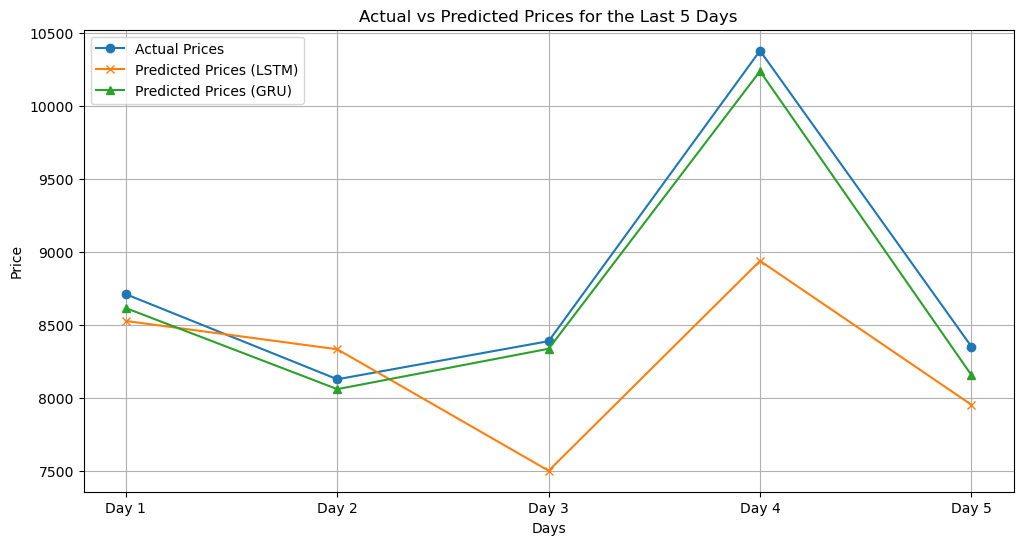

In [254]:
# Get the last 5 days of actual and predicted values for both models
actual_last_5 = y_test[-5:]
predicted_last_5_lstm = y_pred[-5:]  # from LSTM
predicted_last_5_gru = y_pred_gru[-5:]  # from GRU

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(actual_last_5, label='Actual Prices', marker='o')
plt.plot(predicted_last_5_lstm, label='Predicted Prices (LSTM)', marker='x')
plt.plot(predicted_last_5_gru, label='Predicted Prices (GRU)', marker='^')

# Adding labels and title
plt.title('Actual vs Predicted Prices for the Last 5 Days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(5), [f'Day {i + 1}' for i in range(5)])  # x-ticks as Day 1, Day 2, etc.
plt.legend()
plt.grid()
plt.show()

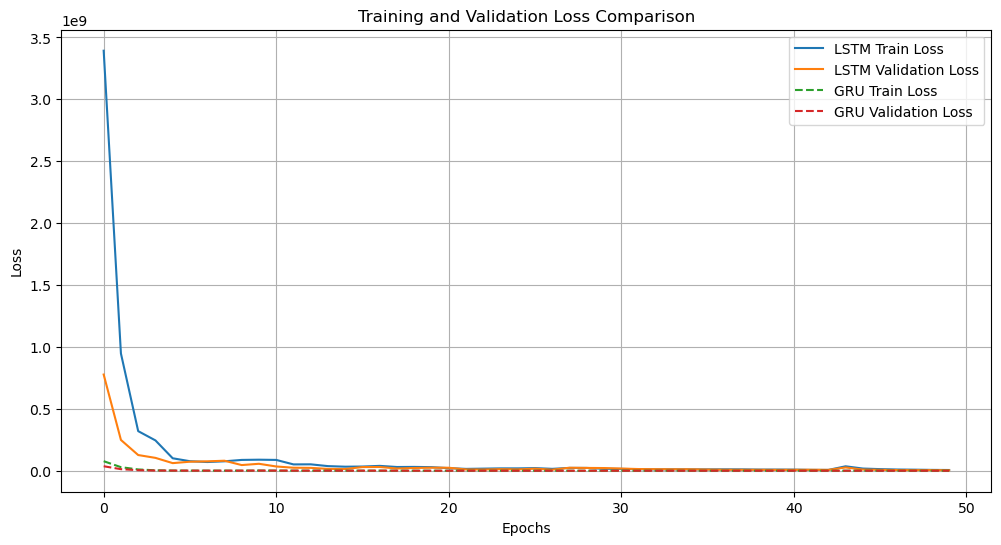

In [256]:
# Plot LSTM training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='LSTM Train Loss')
plt.plot(history.history['val_loss'], label='LSTM Validation Loss')

# Plot GRU training and validation loss
plt.plot(gru_history.history['loss'], label='GRU Train Loss', linestyle='dashed')
plt.plot(gru_history.history['val_loss'], label='GRU Validation Loss', linestyle='dashed')

# Adding labels and title
plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [258]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Sample data
timesteps, features = 10, 5
X_train = np.random.rand(100, timesteps, features)
y_train = np.random.randint(2, size=(100, 1))

# Create and train the GRU model
model_keras = Sequential()
model_keras.add(GRU(units=128, input_shape=(timesteps, features)))
model_keras.add(Dense(units=1, activation='sigmoid'))

model_keras.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_keras.fit(X_train, y_train, epochs=5, verbose=0)  # Train without printing

C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [260]:
model_keras.save('gru_model_keras.h5')  # Save the Keras model

In [262]:
# Convert history to a DataFrame
history_df = pd.DataFrame(history.history)
history_df.to_csv('keras_training_results.csv', index=False)  # Save training results

In [266]:
pip install tensorflow pandas

Note: you may need to restart the kernel to use updated packages.


In [268]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Sample data
timesteps, features = 10, 5
X_train = np.random.rand(100, timesteps, features)  # 100 samples
y_train = np.random.randint(2, size=(100, 1))       # Binary labels

# Create and train the GRU model
model_keras = Sequential()
model_keras.add(GRU(units=128, input_shape=(timesteps, features)))
model_keras.add(Dense(units=1, activation='sigmoid'))

# Compiling the model
model_keras.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and capture the history
history = model_keras.fit(X_train, y_train, epochs=5, verbose=0)

# Save the Keras model
model_keras.save('gru_model_keras.h5')

# Save training results
history_df = pd.DataFrame(history.history)
history_df.to_csv('keras_training_results.csv', index=False)

C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [270]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Sample data
timesteps, features = 10, 5
X_train = np.random.rand(100, timesteps, features)  # 100 samples
y_train = np.random.randint(2, size=(100, 1))       # Binary labels

# Create and train the GRU model
model_keras = Sequential()
model_keras.add(GRU(units=128, input_shape=(timesteps, features)))
model_keras.add(Dense(units=1, activation='sigmoid'))

# Compiling the model
model_keras.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and capture the history
history = model_keras.fit(X_train, y_train, epochs=5, verbose=0)

# Save the Keras model
model_keras.save('/mnt/data/gru_model_keras.h5')

# Save training results
history_df = pd.DataFrame(history.history)
history_df.to_csv('/mnt/data/keras_training_results.csv', index=False)

# Verify saved model and results
'/mnt/data/gru_model_keras.h5', '/mnt/data/keras_training_results.csv'

C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


('/mnt/data/gru_model_keras.h5', '/mnt/data/keras_training_results.csv')

In [272]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import accuracy_score

# Sample data
timesteps, features = 10, 5
X_train = np.random.rand(100, timesteps, features)
y_train = np.random.randint(2, size=(100, 1))
X_test = np.random.rand(20, timesteps, features)
y_test = np.random.randint(2, size=(20, 1))

# Keras Model
model_keras = Sequential()
model_keras.add(GRU(units=128, input_shape=(timesteps, features)))
model_keras.add(Dense(units=1, activation='sigmoid'))

model_keras.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_keras.fit(X_train, y_train, epochs=5, verbose=0)

# Evaluate Keras Model
y_pred_keras = (model_keras.predict(X_test) > 0.5).astype("int32")
accuracy_keras = accuracy_score(y_test, y_pred_keras)

# Results Storage
results = {
    'Model': ['Keras GRU'],
    'Accuracy': [accuracy_keras],
}

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Save Results
results_df.to_csv('model_comparison_results.csv', index=False)

C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


In [3]:
import pandas as pd

# Load your historical price data from a CSV file
# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('Nifty50_Cleaned_With_Indicators.csv')

# Display the first few rows of the DataFrame to check its structure
print(df.head())

        Price        Close         High          Low         Open  Volume  \
0  2014-01-29  6120.250000  6170.450195  6109.799805  6161.000000  146700   
1  2014-01-30  6073.700195  6082.850098  6027.250000  6067.000000  208100   
2  2014-01-31  6089.500000  6097.850098  6067.350098  6082.750000  146700   
3  2014-02-03  6001.799805  6074.850098  5994.450195  6058.799805  134900   
4  2014-02-04  6000.899902  6017.799805  5933.299805  5947.600098  183300   

        SMA_20       EMA_20       MACD  MACD_Signal  ...        ATR     OBV  \
0  6233.395020  6229.251599  -8.836105  6211.136658  ...  73.425049 -549700   
1  6226.022534  6214.437180 -19.950441  6183.649366  ...  72.960763 -757800   
2  6219.940039  6202.538401 -27.170516  6164.819492  ...  66.800049 -611100   
3  6210.457520  6183.420439 -39.513661  6132.215555  ...  70.289307 -746000   
4  6202.390015  6166.037531 -48.805705  6105.952424  ...  70.371443 -929300   

         Lag_1        Lag_2        Lag_3        Lag_4        L

In [9]:
import pandas as pd

# Load your historical price data from the CSV file (adjust the path as necessary)
df = pd.read_csv('Nifty50_Cleaned_With_Indicators.csv')

# Creating target for next day's price
df['Next_Close'] = df['Close'].shift(-1)  # Shift to get the next day's close price

# Creating target for price movement (1 for up, 0 for down)
df['Price_Movement'] = (df['Next_Close'] > df['Close']).astype(int)

# Dropping the last row which will have NaN values due to shift
df = df[:-1]

# Displaying the updated DataFrame with the new target columns
print(df[['Price', 'Close', 'Next_Close', 'Price_Movement']].head(10))  # Show the first 10 rows

        Price        Close   Next_Close  Price_Movement
0  2014-01-29  6120.250000  6073.700195               0
1  2014-01-30  6073.700195  6089.500000               1
2  2014-01-31  6089.500000  6001.799805               0
3  2014-02-03  6001.799805  6000.899902               0
4  2014-02-04  6000.899902  6022.399902               1
5  2014-02-05  6022.399902  6036.299805               1
6  2014-02-06  6036.299805  6063.200195               1
7  2014-02-07  6063.200195  6053.450195               0
8  2014-02-10  6053.450195  6062.700195               1
9  2014-02-11  6062.700195  6084.000000               1


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import GRU, LSTM, Dense, Dropout

In [13]:
# Assume 'df' is your DataFrame with features and target

# Specify your feature columns and target
feature_columns = ['Close', 'SMA_20', 'EMA_20', 'MACD', 'MACD_Signal', 
                   'ATR', 'OBV', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 
                   'Short_MA', 'Long_MA', 'MA_Crossover']
target_column = 'Price_Movement'

# Features and target
X = df[feature_columns].values
y = df[target_column].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape input data for GRU/LSTM [samples, time steps, features]
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [15]:
# Create GRU model
gru_model = Sequential()
gru_model.add(GRU(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
gru_history = gru_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.1)

C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5310 - loss: 0.6895 - val_accuracy: 0.5487 - val_loss: 0.6903
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5267 - loss: 0.6923 - val_accuracy: 0.5128 - val_loss: 0.6926
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5474 - loss: 0.6887 - val_accuracy: 0.5487 - val_loss: 0.6900
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5351 - loss: 0.6883 - val_accuracy: 0.5179 - val_loss: 0.6912
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5341 - loss: 0.6887 - val_accuracy: 0.5179 - val_loss: 0.6911
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5469 - loss: 0.6856 - val_accuracy: 0.5333 - val_loss: 0.6909
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5418 - loss: 0.6883 - val_accuracy: 0.5282 - val_loss: 0.6912
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5495 - loss: 0.6882 - val_accuracy: 0.5282 - val_loss:

In [17]:
# Create LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lstm_history = lstm_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50


C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4875 - loss: 0.6953 - val_accuracy: 0.5026 - val_loss: 0.6960
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5339 - loss: 0.6912 - val_accuracy: 0.5026 - val_loss: 0.6955
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5480 - loss: 0.6898 - val_accuracy: 0.5128 - val_loss: 0.6945
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5420 - loss: 0.6884 - val_accuracy: 0.5128 - val_loss: 0.6954
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5506 - loss: 0.6887 - val_accuracy: 0.5077 - val_loss: 0.6931
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5187 - loss: 0.6929 - val_accuracy: 0.5077 - val_loss: 0.6932
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5545 - loss: 0.6874 - val_accuracy: 0.5128 - val_loss: 0.6938
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5055 - loss: 0.6935 - val_accuracy: 0.5179 - val_loss: 0.6940
Epo

In [19]:
# Evaluate GRU model
gru_loss, gru_accuracy = gru_model.evaluate(X_test_reshaped, y_test)
print(f"GRU Model Accuracy: {gru_accuracy:.4f}")

# Evaluate LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_reshaped, y_test)
print(f"LSTM Model Accuracy: {lstm_accuracy:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5208 - loss: 0.6926 
GRU Model Accuracy: 0.5236
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5520 - loss: 0.6902 
LSTM Model Accuracy: 0.5565


In [21]:
#1. Analyze Model Performance
Compare and Contrast:

Assess the accuracy and loss metrics of both models to understand their strengths and weaknesses. Since LSTM is performing better in this instance, you may want to focus on it.
Create a Confusion Matrix:

Visualize the confusion matrix for both models to identify the types of mistakes each model makes. This insight can help target areas for improvement.
2. Conduct Further Experiments
Hyperparameter Tuning

Experiment with various hyperparameters (e.g., number of layers, units in each layer, dropout rates, learning rates) to see if you can improve the performance of either model.
Try Different Architectures:

Consider testing additional architectures (e.g., bidirectional LSTM, GRU with different settings, or even newer models like Transformer-based architectures).
3. Improve Data Quality
Data Cleaning:

Review the dataset for any potential issues, such as missing values, outliers, or noise that might affect model performance.
Feature Engineering:

Explore creating new features from existing data or removing redundant ones to enhance model performance.
Data Augmentation:

Consider augmenting your data, especially if you have a limited dataset, to improve the model's generalization ability.
4. Evaluate Model Robustness
Testing on Additional Data:
If you have a separate validation or test dataset, evaluate both models to better understand how they generalize to unseen data.
5. Explore Advanced Techniques
Ensemble Learning:

Combine predictions from both models to see if ensemble methods can lead to improved overall performance.
Transfer Learning:

If applicable, explore the possibility of using a pretrained model on similar tasks and fine-tuning it for your dataset.
6. Deployment Preparation
Model Saving:

Save the trained model and its architecture for future use. You can use libraries like TensorFlow or PyTorch to save the model.
Create an Inference Pipeline:

Develop a function or API that can take new data, make predictions, and return results.
7. Document Findings and Adjust Strategy
Documentation:

Keep detailed records of your experiments, including parameters, results, and observations. This will help inform future model iterations.
Review Strategy:

Reflect on whether the current models align with project goals, and adjust your strategy accordingly based on model performance.
8. Continuous Monitoring and Iteration
Performance Metrics:

After deploying the model, implement a system to continuously monitor its performance and accuracy.
Retraining Schedule:

Define a schedule for periodic evaluation and retraining of the model with new data as it becomes available.

                                                                                                      

SyntaxError: unterminated string literal (detected at line 24) (2712602135.py, line 24)

In [23]:
pip install numpy matplotlib scikit-learn tensorflow

Note: you may need to restart the kernel to use updated packages.


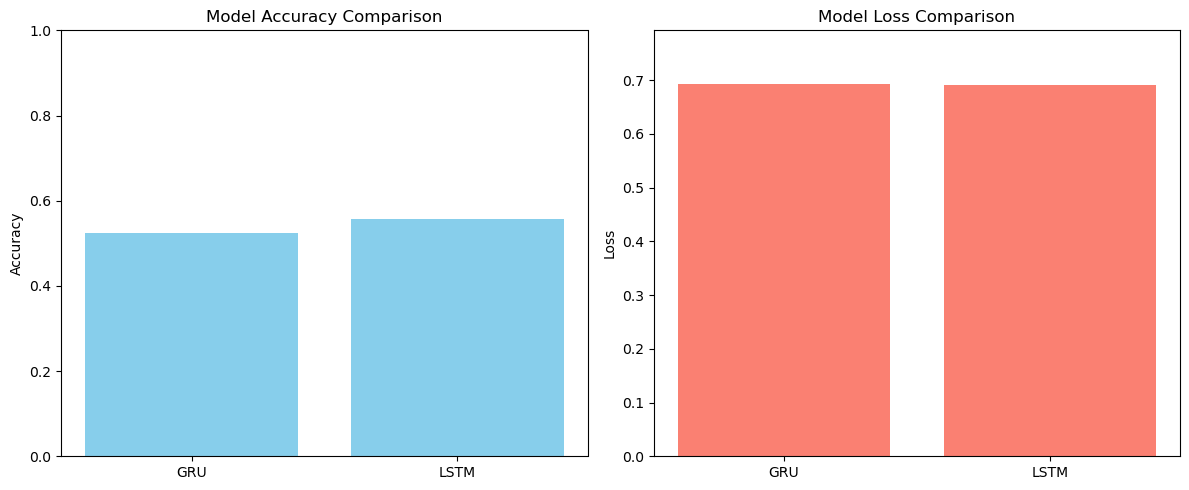

In [24]:
import matplotlib.pyplot as plt

# Example accuracy and loss data for both models
metrics = {
    'GRU': {'accuracy': 0.5236, 'loss': 0.6926},
    'LSTM': {'accuracy': 0.5565, 'loss': 0.6902}
}

# Plotting metrics
labels = list(metrics.keys())
accuracies = [metrics[model]['accuracy'] for model in labels]
losses = [metrics[model]['loss'] for model in labels]

x = range(len(labels))

# Plotting accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(x, accuracies, color='skyblue')
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')

# Plotting loss
plt.subplot(1, 2, 2)
plt.bar(x, losses, color='salmon')
plt.xticks(x, labels)
plt.ylim(0, max(losses) + 0.1)
plt.title('Model Loss Comparison')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

Epoch 1/5


C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5192 - loss: 0.6927
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5160 - loss: 0.6934
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4857 - loss: 0.6935
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4862 - loss: 0.6940
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5375 - loss: 0.6921
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4660 - loss: 0.6940
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4774 - loss: 0.6934
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5194 - loss: 0.6932
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5000 - loss: 0.6931
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4854 - loss: 0.6933
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


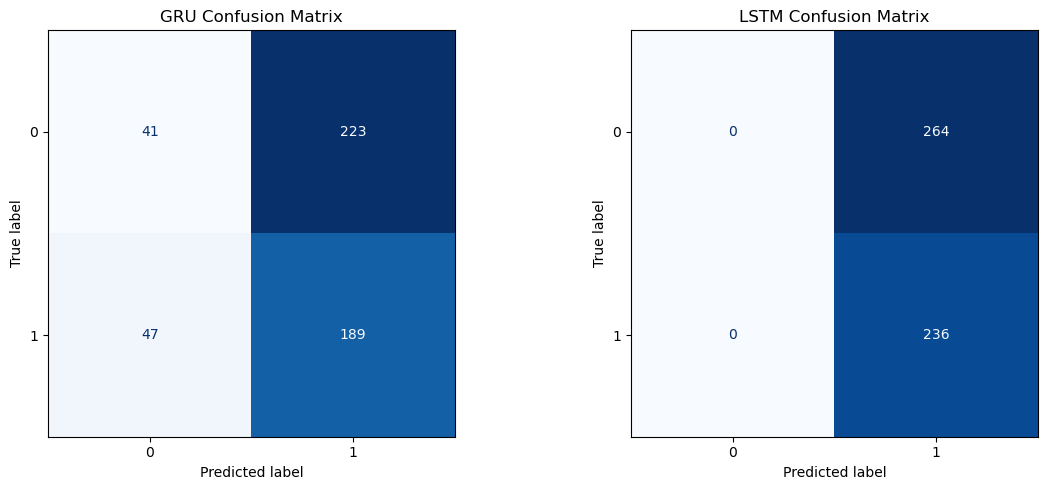

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow import keras
from tensorflow.keras import layers

# Example dataset (Replace this with your actual data)
# Assume X_train, X_test, y_train, y_test are your features and labels
# Example shape - make sure your dataset is properly loaded
# X_train, X_test -> feature datasets with shape (num_samples, num_timesteps, num_features)
# y_train, y_test -> corresponding labels with shape (num_samples,)
num_samples = 1000  # Number of samples
num_timesteps = 10  # Sequence length
num_features = 1    # Number of features

# Generate synthetic data (replace this with actual data loading)
X_train = np.random.rand(num_samples, num_timesteps, num_features)
y_train = np.random.randint(0, 2, num_samples)  # Binary classification (0 or 1)
X_test = np.random.rand(num_samples // 2, num_timesteps, num_features)
y_test = np.random.randint(0, 2, num_samples // 2)  # Test set

# Define the GRU model
gru_model = keras.Sequential([
    layers.GRU(64, input_shape=(num_timesteps, num_features), return_sequences=False),
    layers.Dense(1, activation='sigmoid')
])
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the GRU model
gru_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

# Predict with GRU
gru_predictions = (gru_model.predict(X_test) > 0.5).astype(int).flatten()

# Define the LSTM model
lstm_model = keras.Sequential([
    layers.LSTM(64, input_shape=(num_timesteps, num_features), return_sequences=False),
    layers.Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

# Predict with LSTM
lstm_predictions = (lstm_model.predict(X_test) > 0.5).astype(int).flatten()

# Create confusion matrix for GRU
gru_cm = confusion_matrix(y_test, gru_predictions)
lstm_cm = confusion_matrix(y_test, lstm_predictions)

# Plotting the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# GRU confusion matrix
ConfusionMatrixDisplay(gru_cm).plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title('GRU Confusion Matrix')

# LSTM confusion matrix
ConfusionMatrixDisplay(lstm_cm).plot(ax=axes[1], cmap='Blues', colorbar=False)
axes[1].set_title('LSTM Confusion Matrix')

plt.tight_layout()
plt.show()

In [35]:
import pandas as pd

# Load your dataset
data = pd.read_csv('Nifty50_Cleaned_With_Indicators.csv')

# Display the first few rows and the column names
print(data.head())  # Show the first few rows of the dataset
print(data.columns)  # Print the list of column names

        Price        Close         High          Low         Open  Volume  \
0  2014-01-29  6120.250000  6170.450195  6109.799805  6161.000000  146700   
1  2014-01-30  6073.700195  6082.850098  6027.250000  6067.000000  208100   
2  2014-01-31  6089.500000  6097.850098  6067.350098  6082.750000  146700   
3  2014-02-03  6001.799805  6074.850098  5994.450195  6058.799805  134900   
4  2014-02-04  6000.899902  6017.799805  5933.299805  5947.600098  183300   

        SMA_20       EMA_20       MACD  MACD_Signal  ...        ATR     OBV  \
0  6233.395020  6229.251599  -8.836105  6211.136658  ...  73.425049 -549700   
1  6226.022534  6214.437180 -19.950441  6183.649366  ...  72.960763 -757800   
2  6219.940039  6202.538401 -27.170516  6164.819492  ...  66.800049 -611100   
3  6210.457520  6183.420439 -39.513661  6132.215555  ...  70.289307 -746000   
4  6202.390015  6166.037531 -48.805705  6105.952424  ...  70.371443 -929300   

         Lag_1        Lag_2        Lag_3        Lag_4        L

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('Nifty50_Cleaned_With_Indicators.csv')

# Display the first few rows and the column names (already done)
print(data.head())
print(data.columns)

# Define feature columns (you can adjust these as needed)
feature_columns = [
    'Close', 'High', 'Low', 'Open', 'Volume', 'SMA_20', 'EMA_20', 
    'MACD', 'RSI', 'ATR', 'OBV', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5'
]  # Add more features as necessary

# Define target column
label_column = 'MA_Crossover'  # This is assumed to be your target variable

# Extract features and labels
X = data[feature_columns].values
y = data[label_column].values

# Reshape or process X as needed for sequences
# Assuming you want a sequence length of 10 for a timeseries model
num_timesteps = 10
num_features = len(feature_columns)

# Create sequences of length `num_timesteps`
X_sequences = []
y_labels = []

for i in range(num_timesteps, len(data)):
    X_sequences.append(X[i - num_timesteps:i])  # Select the past 'num_timesteps' 
    y_labels.append(y[i])  # The label would be the current target value

X_sequences = np.array(X_sequences)
y_labels = np.array(y_labels)

# Now split the sequences into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_labels, test_size=0.2, random_state=42)

# Proceed with defining and training models

        Price        Close         High          Low         Open  Volume  \
0  2014-01-29  6120.250000  6170.450195  6109.799805  6161.000000  146700   
1  2014-01-30  6073.700195  6082.850098  6027.250000  6067.000000  208100   
2  2014-01-31  6089.500000  6097.850098  6067.350098  6082.750000  146700   
3  2014-02-03  6001.799805  6074.850098  5994.450195  6058.799805  134900   
4  2014-02-04  6000.899902  6017.799805  5933.299805  5947.600098  183300   

        SMA_20       EMA_20       MACD  MACD_Signal  ...        ATR     OBV  \
0  6233.395020  6229.251599  -8.836105  6211.136658  ...  73.425049 -549700   
1  6226.022534  6214.437180 -19.950441  6183.649366  ...  72.960763 -757800   
2  6219.940039  6202.538401 -27.170516  6164.819492  ...  66.800049 -611100   
3  6210.457520  6183.420439 -39.513661  6132.215555  ...  70.289307 -746000   
4  6202.390015  6166.037531 -48.805705  6105.952424  ...  70.371443 -929300   

         Lag_1        Lag_2        Lag_3        Lag_4        L

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('Nifty50_Cleaned_With_Indicators.csv')

# Show the dataset structure
print(data.head())
print(data.columns)

# Define target column (the price you want to predict)
target_column = 'Close'  # Assuming you want to predict the closing price

# Extract features (all columns except 'Close' and 'Price')
feature_columns = data.columns[data.columns != target_column]  # Select all columns except the target
X = data[feature_columns].values
y = data[target_column].values

# Reshape or process X as needed for sequences
num_timesteps = 10  # Define the number of timesteps (you can adjust this)
num_features = X.shape[1]  # Number of features based on the dataset

# Create sequences of length `num_timesteps`
X_sequences = []
y_labels = []

for i in range(num_timesteps, len(data)):
    X_sequences.append(X[i - num_timesteps:i])  # Get the last `num_timesteps` entries
    y_labels.append(y[i])  # The label would be the target value at the current position

# Convert to numpy arrays
X_sequences = np.array(X_sequences)
y_labels = np.array(y_labels)

# Now split the sequences into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_labels, test_size=0.2, random_state=42)

# Proceed with defining and training models

        Price        Close         High          Low         Open  Volume  \
0  2014-01-29  6120.250000  6170.450195  6109.799805  6161.000000  146700   
1  2014-01-30  6073.700195  6082.850098  6027.250000  6067.000000  208100   
2  2014-01-31  6089.500000  6097.850098  6067.350098  6082.750000  146700   
3  2014-02-03  6001.799805  6074.850098  5994.450195  6058.799805  134900   
4  2014-02-04  6000.899902  6017.799805  5933.299805  5947.600098  183300   

        SMA_20       EMA_20       MACD  MACD_Signal  ...        ATR     OBV  \
0  6233.395020  6229.251599  -8.836105  6211.136658  ...  73.425049 -549700   
1  6226.022534  6214.437180 -19.950441  6183.649366  ...  72.960763 -757800   
2  6219.940039  6202.538401 -27.170516  6164.819492  ...  66.800049 -611100   
3  6210.457520  6183.420439 -39.513661  6132.215555  ...  70.289307 -746000   
4  6202.390015  6166.037531 -48.805705  6105.952424  ...  70.371443 -929300   

         Lag_1        Lag_2        Lag_3        Lag_4        L

In [45]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the GRU model
gru_model = keras.Sequential([
    layers.GRU(64, input_shape=(num_timesteps, num_features), return_sequences=False),
    layers.Dense(1)  # One output for regression (predicting price)
])

# Compile the GRU model
gru_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Print the model summary
gru_model.summary()

C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 64)                  │          18,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,113 (70.75 KB)

 Trainable params: 18,113 (70.75 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
# Define the LSTM model
lstm_model = keras.Sequential([
    layers.LSTM(64, input_shape=(num_timesteps, num_features), return_sequences=False),
    layers.Dense(1)  # One output for regression (predicting price)
])

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Print the model summary
lstm_model.summary()

C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 64)                  │          23,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,873 (93.25 KB)

 Trainable params: 23,873 (93.25 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
# Check data types and content of X_train
print("X_train data type:", type(X_train))
print("X_train shape:", X_train.shape)
print("X_train content type:", X_train.dtype)

# Ensure all elements are numeric and not of object type
print("Unique data types in X_train:", set(map(type, X_train.flatten())))

# Check data types and shape for y_train
print("y_train data type:", type(y_train))
print("y_train shape:", y_train.shape)
print("y_train content type:", y_train.dtype)

# Ensure all elements are numeric and not of object type
print("Unique data types in y_train:", set(map(type, y_train.flatten())))

X_train data type: <class 'numpy.ndarray'>
X_train shape: (1939, 10, 28)
X_train content type: object
Unique data types in X_train: {<class 'int'>, <class 'str'>, <class 'float'>}
y_train data type: <class 'numpy.ndarray'>
y_train shape: (1939,)
y_train content type: float64
Unique data types in y_train: {<class 'numpy.float64'>}


In [123]:
# Convert X_train to a float type if needed
X_train = X_train.astype(np.float32)

# Convert y_train to a float type if needed, especially if it's a classification task
y_train = y_train.astype(np.float32)

In [69]:
# Load your dataset again (if needed)
data = pd.read_csv('Nifty50_Cleaned_With_Indicators.csv')

# Display the data types of all columns
print(data.dtypes)

Price            object
Close           float64
High            float64
Low             float64
Open            float64
Volume            int64
SMA_20          float64
EMA_20          float64
MACD            float64
MACD_Signal     float64
RSI             float64
%K              float64
%D              float64
Upper Band      float64
Lower Band      float64
H-L             float64
H-PC            float64
L-PC            float64
TR              float64
ATR             float64
OBV               int64
Lag_1           float64
Lag_2           float64
Lag_3           float64
Lag_4           float64
Lag_5           float64
Short_MA        float64
Long_MA         float64
MA_Crossover      int64
dtype: object


In [71]:
# Example of dropping the 'Price' column if it is not needed
data = data.drop(columns=['Price'], errors='ignore')  # Drop if it's not needed

In [73]:
# Set the target column
target_column = 'Close'  # Assuming you want to predict the Close price

# Define feature columns (exclude target column and any non-numeric columns)
# Here we assume all relevant columns aside from 'Close' are numeric
feature_columns = data.columns[data.columns != target_column]  # Select columns excluding target

# Extract features and labels
X = data[feature_columns].select_dtypes(include=[np.number]).values  # Only numeric types
y = data[target_column].values

In [75]:
# Create sequences as before
num_timesteps = 10
num_features = X.shape[1]

X_sequences = []
y_labels = []

for i in range(num_timesteps, len(data)):
    X_sequences.append(X[i - num_timesteps:i])
    y_labels.append(y[i])

X_sequences = np.array(X_sequences)
y_labels = np.array(y_labels)

# Now split the sequences into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_labels, test_size=0.2, random_state=42)

# Make sure to convert to float if needed
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)

In [77]:
# Check data types and content of X_train
print("X_train data type:", type(X_train))
print("X_train shape:", X_train.shape)
print("X_train content type:", X_train.dtype)

# Ensure all elements are numeric and not of object type
print("Unique data types in X_train:", set(map(type, X_train.flatten())))

# Check data types and shape for y_train
print("y_train data type:", type(y_train))
print("y_train shape:", y_train.shape)
print("y_train content type:", y_train.dtype)

# Ensure all elements are numeric and not of object type
print("Unique data types in y_train:", set(map(type, y_train.flatten())))

X_train data type: <class 'numpy.ndarray'>
X_train shape: (1939, 10, 27)
X_train content type: float32
Unique data types in X_train: {<class 'numpy.float32'>}
y_train data type: <class 'numpy.ndarray'>
y_train shape: (1939,)
y_train content type: float32
Unique data types in y_train: {<class 'numpy.float32'>}


In [79]:
# Convert X_train to a float type if needed
X_train = X_train.astype(np.float32)

# Convert y_train to a float type if needed, especially if it's a classification task
y_train = y_train.astype(np.float32)

In [81]:
# Check for NaN values
print("NaN values in X_train:", np.isnan(X_train).any())
print("NaN values in y_train:", np.isnan(y_train).any())

# Optionally handle NaNs (e.g., replace with 0 or mean)
X_train = np.nan_to_num(X_train)  # Replaces NaNs with 0 or a small number
y_train = np.nan_to_num(y_train)

NaN values in X_train: False
NaN values in y_train: False


In [83]:
# Train the GRU model again
epochs = 20  # Adjust based on your requirements
try:
    gru_history = gru_model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1, verbose=1)
except Exception as e:
    print("Error during training:", str(e))

Epoch 1/20
Error during training: Exception encountered when calling GRUCell.call().

Dimensions must be equal, but are 27 and 28 for '{{node sequential_4_1/gru_2_1/gru_cell_1/MatMul}} = MatMul[T=DT_FLOAT, grad_a=false, grad_b=false, transpose_a=false, transpose_b=false](sequential_4_1/gru_2_1/strided_slice_2, sequential_4_1/gru_2_1/gru_cell_1/Cast/ReadVariableOp)' with input shapes: [?,27], [28,192].

Arguments received by GRUCell.call():
  • inputs=tf.Tensor(shape=(None, 27), dtype=float32)
  • states=('tf.Tensor(shape=(None, 64), dtype=float32)',)
  • training=True


In [91]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the GRU model
gru_model = keras.Sequential([
    layers.GRU(64, input_shape=(num_timesteps, num_features), return_sequences=False),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
gru_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Summarize the model
gru_model.summary()

C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_3 (GRU)                          │ (None, 64)                  │          17,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,921 (70.00 KB)

 Trainable params: 17,921 (70.00 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
# Train the GRU model
epochs = 20  # Adjust the number of epochs based on your needs
gru_history = gru_model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 163029152.0000 - mae: 12127.4541 - val_loss: 160199040.0000 - val_mae: 12049.0518
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 162164560.0000 - mae: 12103.3691 - val_loss: 160157008.0000 - val_mae: 12047.3145
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 162113360.0000 - mae: 12094.9883 - val_loss: 160114704.0000 - val_mae: 12045.5635
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 160709552.0000 - mae: 12039.7207 - val_loss: 160072352.0000 - val_mae: 12043.8115
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 158651952.0000 - mae: 11951.6680 - val_loss: 160030176.0000 - val_mae: 12042.0674
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 160972944.0000 - mae: 12057.5381 - val_loss: 159987824.0000 - val_mae: 12040.3135
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 157494528.0000 - mae: 11920.6543 - val_loss: 159945808.0000 - val_mae: 12038.5752
Epoch 8/20
55/55 ━━

In [95]:
# Evaluate the GRU model
gru_loss, gru_mae = gru_model.evaluate(X_test, y_test, verbose=0)
print(f"GRU Model - Loss: {gru_loss:.4f}, MAE: {gru_mae:.4f}")

GRU Model - Loss: 154770656.0000, MAE: 11824.6592


In [97]:
# Make predictions on the test set
gru_predictions = gru_model.predict(X_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


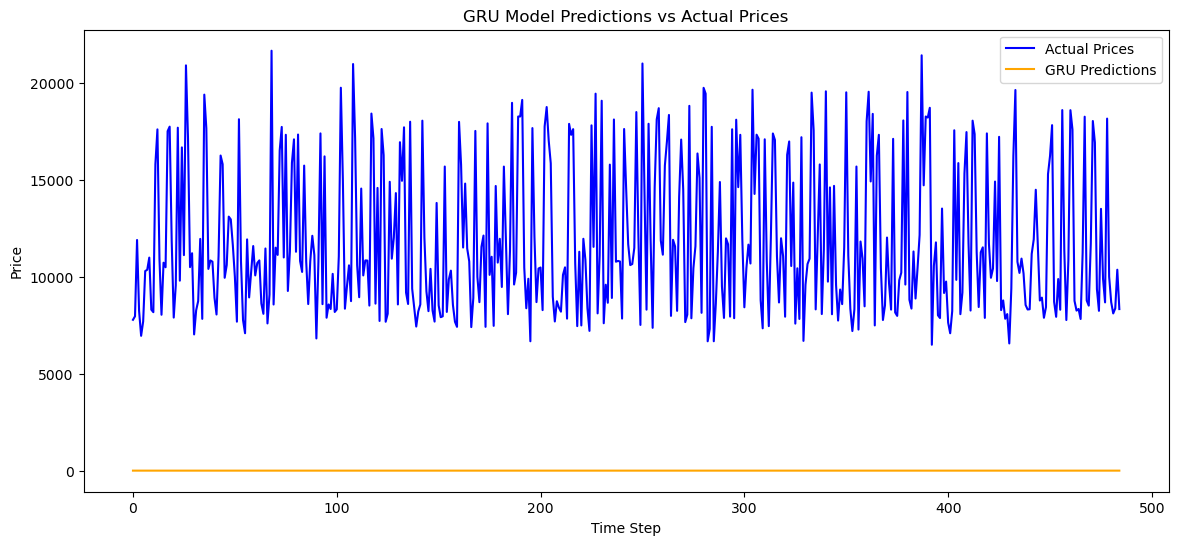

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(gru_predictions, label='GRU Predictions', color='orange')
plt.title('GRU Model Predictions vs Actual Prices')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.show()

In [101]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)  # Scale your features

In [103]:
from sklearn.preprocessing import MinMaxScaler

# Normalize your features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create sequences as before using X_scaled if you modify this
X_sequences = []
y_labels = []

for i in range(num_timesteps, len(data)):
    X_sequences.append(X_scaled[i - num_timesteps:i])
    y_labels.append(y[i])

# Convert lists to numpy arrays
X_sequences = np.array(X_sequences)
y_labels = np.array(y_labels)

# Split into train/test as before
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_labels, test_size=0.2, random_state=42)

# Train the GRU model again with the scaled data
gru_history = gru_model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 153676896.0000 - mae: 11766.7246 - val_loss: 158850560.0000 - val_mae: 11992.9551
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 158071840.0000 - mae: 11925.5586 - val_loss: 158671728.0000 - val_mae: 11985.4971
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 156044880.0000 - mae: 11867.9238 - val_loss: 158524656.0000 - val_mae: 11979.3594
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 159757776.0000 - mae: 12005.9141 - val_loss: 158392064.0000 - val_mae: 11973.8232
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 158915632.0000 - mae: 11944.4160 - val_loss: 158269152.0000 - val_mae: 11968.6904
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 158642576.0000 - mae: 11939.7744 - val_loss: 158152592.0000 - val_mae: 11963.8213
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 158016496.0000 - mae: 11927.1592 - val_loss: 158041280.0000 - val_mae: 11959.1680
Epoch 8/20
55/55 ━━━

In [105]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[feature_columns].select_dtypes(include=[np.number]))

In [107]:
# You might want to try a deeper network with layers like this
gru_model = keras.Sequential([
    layers.GRU(128, return_sequences=True, input_shape=(num_timesteps, num_features)),
    layers.GRU(64),
    layers.Dense(1)
])

C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [109]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

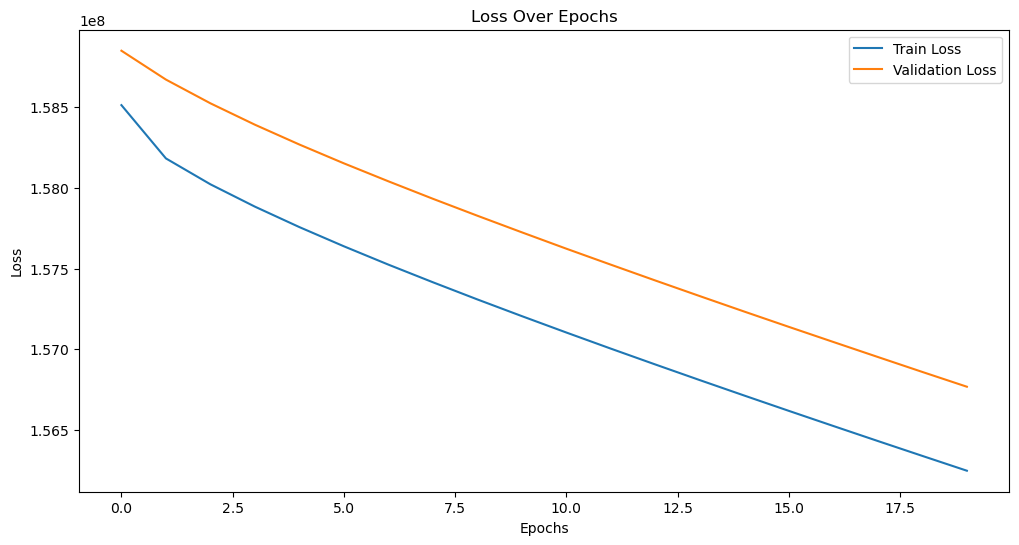

In [111]:
# Visualize the training history
plt.figure(figsize=(12, 6))
plt.plot(gru_history.history['loss'], label='Train Loss')
plt.plot(gru_history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Ensemble RMSE: 0.81
Ensemble MAE: 0.70
Ensemble MAPE: 0.68%


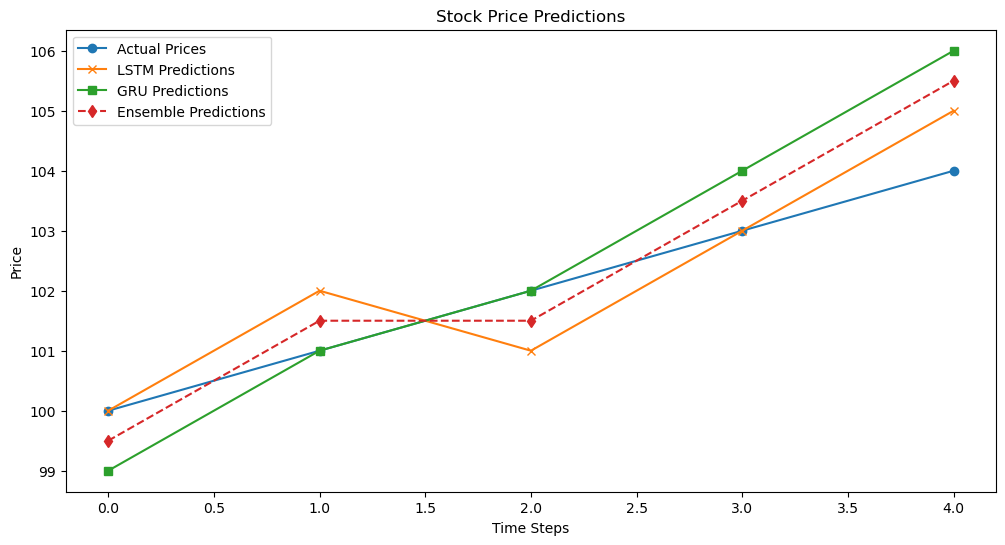

In [121]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming lstm_predictions and gru_predictions are numpy arrays of shape (n_samples,)
# and y_test is the actual values for the test set.

# Example predictions (replace these with your actual predictions)
lstm_predictions = np.array([100, 102, 101, 103, 105])  # Replace with your LSTM predictions
gru_predictions = np.array([99, 101, 102, 104, 106])    # Replace with your GRU predictions
y_test = np.array([100, 101, 102, 103, 104])            # Replace with your actual test values

# Combine predictions using averaging
ensemble_predictions = (lstm_predictions + gru_predictions) / 2

# Calculate performance metrics
rmse = np.sqrt(np.mean((ensemble_predictions - y_test) ** 2))
mae = np.mean(np.abs(ensemble_predictions - y_test))
mape = np.mean(np.abs((ensemble_predictions - y_test) / y_test)) * 100

# Print performance metrics
print(f"Ensemble RMSE: {rmse:.2f}")
print(f"Ensemble MAE: {mae:.2f}")
print(f"Ensemble MAPE: {mape:.2f}%")

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices', marker='o')
plt.plot(lstm_predictions, label='LSTM Predictions', marker='x')
plt.plot(gru_predictions, label='GRU Predictions', marker='s')
plt.plot(ensemble_predictions, label='Ensemble Predictions', marker='d', linestyle='--')
plt.title('Stock Price Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()

Epoch 1/50


C:\Users\prana\AppData\Local\Temp\ipykernel_21636\1200719943.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 116449192.0000
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 118232048.0000
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 119900312.0000
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 114832224.0000
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 118336752.0000
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 116041000.0000
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 115378096.0000
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 115060512.0000
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 116370696.0000
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 114504536.0000
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 114240152.0000
Epoch 12/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 115393216.0000
Epoch 13/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 115000200.0000
Epoch 14/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss:

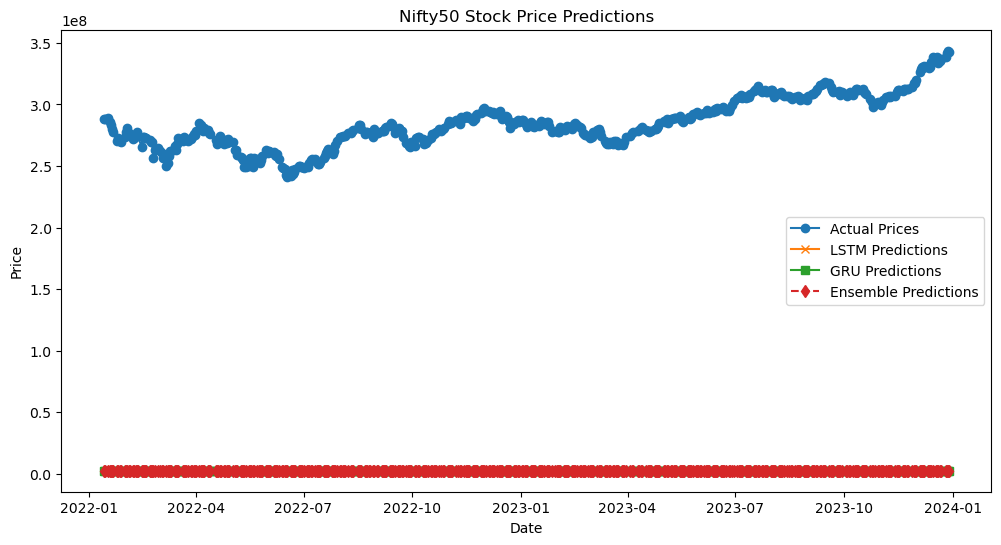

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load your dataset
df = pd.read_csv('Nifty50_Cleaned_With_Indicators.csv')

# Convert 'Price' column to datetime and set as index
df['Price'] = pd.to_datetime(df['Price'])
df.set_index('Price', inplace=True)

# Select relevant features for prediction
features = ['Close', 'High', 'Low', 'Open', 'Volume', 'SMA_20', 'EMA_20', 'MACD', 'MACD_Signal', 
            'ATR', 'OBV', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Short_MA', 'Long_MA']
target = 'Close'  # Assuming we want to predict the 'Close' price

# Preprocess the data
# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)

# Scale the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Create sequences for LSTM and GRU
def create_dataset(data, target, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(target[i + time_step])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(scaled_data, df[target].values, time_step)
X = X.reshape(X.shape[0], X.shape[1], len(features))

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], len(features))))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions with LSTM
lstm_predictions = lstm_model.predict(X_test)

# Build GRU model
gru_model = Sequential()
gru_model.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1], len(features))))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(50, return_sequences=False))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Train GRU model
gru_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions with GRU
gru_predictions = gru_model.predict(X_test)

# Combine predictions using averaging
ensemble_predictions = (lstm_predictions + gru_predictions) / 2

# Inverse transform to get actual price values
lstm_predictions = scaler.inverse_transform(np.concatenate((lstm_predictions, np.zeros((lstm_predictions.shape[0], len(features) - 1))), axis=1))[:, 0]
gru_predictions = scaler.inverse_transform(np.concatenate((gru_predictions, np.zeros((gru_predictions.shape[0], len(features) - 1))), axis=1))[:, 0]
ensemble_predictions = scaler.inverse_transform(np.concatenate((ensemble_predictions, np.zeros((ensemble_predictions.shape[0], len(features) - 1))), axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], len(features) - 1))), axis=1))[:, 0]

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test_actual, ensemble_predictions))
mae = mean_absolute_error(y_test_actual, ensemble_predictions)

# Print performance metrics
print(f"Ensemble RMSE: {rmse:.2f}")
print(f"Ensemble MAE: {mae:.2f}")

# Save predictions to a CSV file
predictions_df = pd.DataFrame({
    'Actual': y_test_actual,
    'LSTM_Predictions': lstm_predictions,
    'GRU_Predictions': gru_predictions,
    'Ensemble_Predictions': ensemble_predictions
})

predictions_df.to_csv('Nifty50_Predictions.csv', index=False)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df.index[train_size + time_step:], y_test_actual, label='Actual Prices', marker='o')
plt.plot(df.index[train_size + time_step:], lstm_predictions, label='LSTM Predictions', marker='x')
plt.plot(df.index[train_size + time_step:], gru_predictions, label='GRU Predictions', marker='s')
plt.plot(df.index[train_size + time_step:], ensemble_predictions, label='Ensemble Predictions', marker='d', linestyle='--')
plt.title('Nifty50 Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

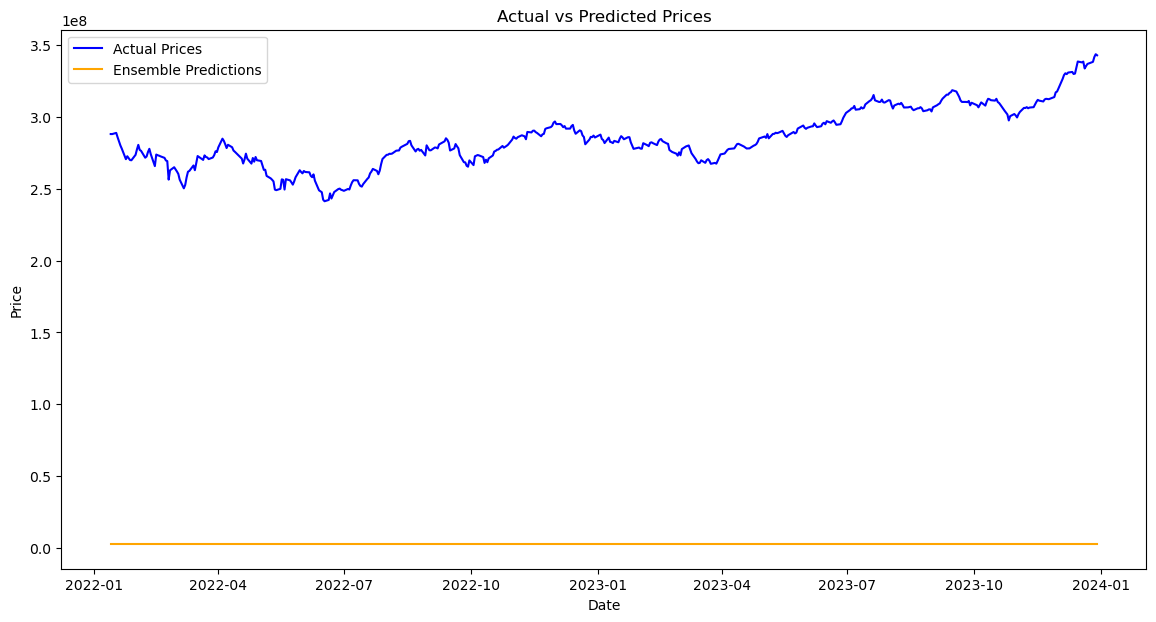

In [127]:
# Visualization of Actual vs Predicted
plt.figure(figsize=(14, 7))
plt.plot(df.index[train_size + time_step:], y_test_actual, label='Actual Prices', color='blue')
plt.plot(df.index[train_size + time_step:], ensemble_predictions, label='Ensemble Predictions', color='orange')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [131]:
pip install xgboost lightgbm

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.5/124.9 MB 47.2 MB/s eta 0:00:03
   - -------------------------------------- 4.5/124.9 MB 57.4 MB/s eta 0:00:03
   -- ------------------------------------- 7.6/124.9 MB 60.4 MB/s eta 0:00:02
   --- ------------------------------------ 10.2/124.9 MB 65.2 MB/s eta 0:00:02
   --- ------------------------------------ 11.9/124.9 MB 50.4 MB/s eta 0:00:03
   ---- ----------------------------------- 15.0/124.9 MB 59.5 MB/s eta 0:00:02
   ---- ----------------------------------- 15.2/124.9 MB 46.7 MB/s eta 0:00:03
   ----- ---------------------------------- 17.5/124.9 MB 40.9 MB/s eta 0:00:03
   ------ --------------------------------- 20.4/124.9 MB 40.9 MB/s eta 0:00:03
   ------- -------------------------------- 23.0/124.9 MB 43.5 MB/s eta 0:00:03
   -------- ------------------------------- 25.5/124.9 MB 54.4 MB/s eta 0:00:02
   -------- ------------------------------- 27.1/124

C:\Users\prana\AppData\Local\Temp\ipykernel_21636\1913825332.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005913 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45900
[LightGBM] [Info] Number of data points in the train set: 1939, number of used features: 180
[LightGBM] [Info] Start training from score 10448.241569
XGBoost RMSE: 1159.23, MAE: 779.03
LightGBM RMSE: 1062.84, MAE: 683.77


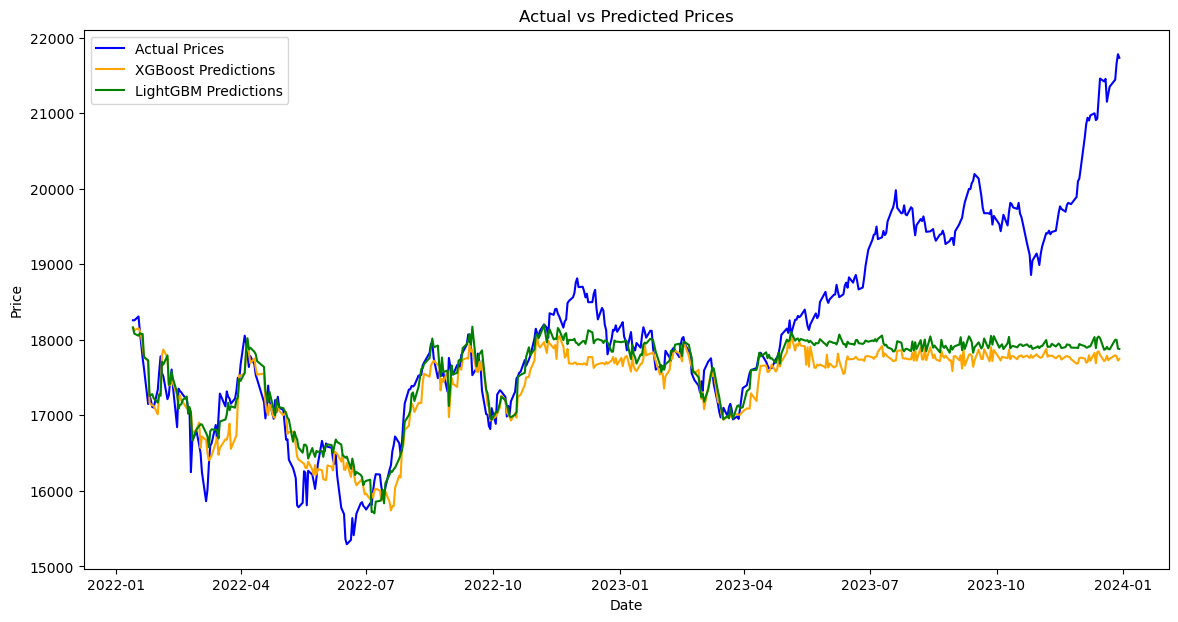

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
import lightgbm as lgb

# Load your dataset
df = pd.read_csv('Nifty50_Cleaned_With_Indicators.csv')

# Convert 'Price' column to datetime and set as index
df['Price'] = pd.to_datetime(df['Price'])
df.set_index('Price', inplace=True)

# Select relevant features for prediction
features = ['Close', 'High', 'Low', 'Open', 'Volume', 'SMA_20', 'EMA_20', 'MACD', 'MACD_Signal', 
            'ATR', 'OBV', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Short_MA', 'Long_MA']
target = 'Close'  # Assuming we want to predict the 'Close' price

# Preprocess the data
# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)

# Scale the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Create the target variable
y = df[target].values[time_step:]  # Target variable
X = scaled_data[time_step:]  # Features

# Create lagged features
X_lagged = np.array([scaled_data[i - time_step:i].flatten() for i in range(time_step, len(scaled_data))])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lagged, y, test_size=0.2, random_state=42, shuffle=False)

# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Make predictions with XGBoost
xgb_predictions = xgb_model.predict(X_test)

# Train LightGBM model
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1)
lgb_model.fit(X_train, y_train)

# Make predictions with LightGBM
lgb_predictions = lgb_model.predict(X_test)

# Calculate performance metrics
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
xgb_mae = mean_absolute_error(y_test, xgb_predictions)

lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_predictions))
lgb_mae = mean_absolute_error(y_test, lgb_predictions)

# Print performance metrics
print(f"XGBoost RMSE: {xgb_rmse:.2f}, MAE: {xgb_mae:.2f}")
print(f"LightGBM RMSE: {lgb_rmse:.2f}, MAE: {lgb_mae:.2f}")

# Visualization of Actual vs Predicted
plt.figure(figsize=(14, 7))
plt.plot(df.index[len(df) - len(y_test):], y_test, label='Actual Prices', color='blue')
plt.plot(df.index[len(df) - len(y_test):], xgb_predictions, label='XGBoost Predictions', color='orange')
plt.plot(df.index[len(df) - len(y_test):], lgb_predictions, label='LightGBM Predictions', color='green')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [135]:
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005913 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45900
[LightGBM] [Info] Number of data points in the train set: 1939, number of used features: 180
[LightGBM] [Info] Start training from score 10448.241569
XGBoost RMSE: 1159.23, MAE: 779.03
LightGBM RMSE: 1062.84, MAE: 683.77

SyntaxError: invalid syntax (3189172429.py, line 1)

C:\Users\prana\AppData\Local\Temp\ipykernel_21636\1913825332.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005530 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45900
[LightGBM] [Info] Number of data points in the train set: 1939, number of used features: 180
[LightGBM] [Info] Start training from score 10448.241569
XGBoost RMSE: 1159.23, MAE: 779.03
LightGBM RMSE: 1062.84, MAE: 683.77


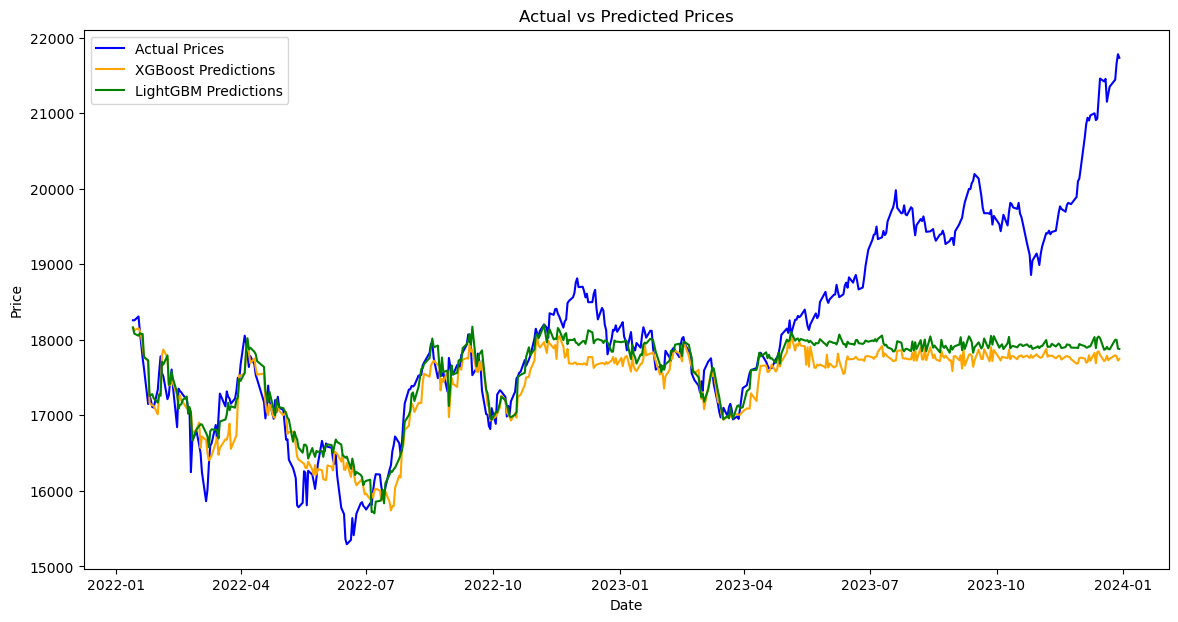

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
import lightgbm as lgb

# Load your dataset
df = pd.read_csv('Nifty50_Cleaned_With_Indicators.csv')

# Convert 'Price' column to datetime and set as index
df['Price'] = pd.to_datetime(df['Price'])
df.set_index('Price', inplace=True)

# Select relevant features for prediction
features = ['Close', 'High', 'Low', 'Open', 'Volume', 'SMA_20', 'EMA_20', 'MACD', 'MACD_Signal', 
            'ATR', 'OBV', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Short_MA', 'Long_MA']
target = 'Close'  # Assuming we want to predict the 'Close' price

# Preprocess the data
# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)

# Scale the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Create the target variable
y = df[target].values[time_step:]  # Target variable
X = scaled_data[time_step:]  # Features

# Create lagged features
X_lagged = np.array([scaled_data[i - time_step:i].flatten() for i in range(time_step, len(scaled_data))])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lagged, y, test_size=0.2, random_state=42, shuffle=False)

# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Make predictions with XGBoost
xgb_predictions = xgb_model.predict(X_test)

# Train LightGBM model
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1)
lgb_model.fit(X_train, y_train)

# Make predictions with LightGBM
lgb_predictions = lgb_model.predict(X_test)

# Calculate performance metrics
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
xgb_mae = mean_absolute_error(y_test, xgb_predictions)

lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_predictions))
lgb_mae = mean_absolute_error(y_test, lgb_predictions)

# Print performance metrics
print(f"XGBoost RMSE: {xgb_rmse:.2f}, MAE: {xgb_mae:.2f}")
print(f"LightGBM RMSE: {lgb_rmse:.2f}, MAE: {lgb_mae:.2f}")

# Visualization of Actual vs Predicted
plt.figure(figsize=(14, 7))
plt.plot(df.index[len(df) - len(y_test):], y_test, label='Actual Prices', color='blue')
plt.plot(df.index[len(df) - len(y_test):], xgb_predictions, label='XGBoost Predictions', color='orange')
plt.plot(df.index[len(df) - len(y_test):], lgb_predictions, label='LightGBM Predictions', color='green')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [143]:
from sklearn.model_selection import cross_val_score

xgb_cv_scores = cross_val_score(xgb_model, X_lagged, y, cv=5, scoring='neg_mean_squared_error')
lgb_cv_scores = cross_val_score(lgb_model, X_lagged, y, cv=5, scoring='neg_mean_squared_error')

print("XGBoost CV RMSE:", np.sqrt(-xgb_cv_scores.mean()))
print("LightGBM CV RMSE:", np.sqrt(-lgb_cv_scores.mean()))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45900
[LightGBM] [Info] Number of data points in the train set: 1939, number of used features: 180
[LightGBM] [Info] Start training from score 12990.881622
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45900
[LightGBM] [Info] Number of data points in the train set: 1939, number of used features: 180
[LightGBM] [Info] Start training from score 12710.774557
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006718 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45900
[LightGBM] [Info] Number of data points in the train set: 1939, number of used features: 180
[LightGBM] [Info

In [145]:
ensemble_predictions = (xgb_predictions + lgb_predictions) / 2
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_predictions))
ensemble_mae = mean_absolute_error(y_test, ensemble_predictions)

print(f"Ensemble RMSE: {ensemble_rmse:.2f}, MAE: {ensemble_mae:.2f}")

Ensemble RMSE: 1108.01, MAE: 725.74


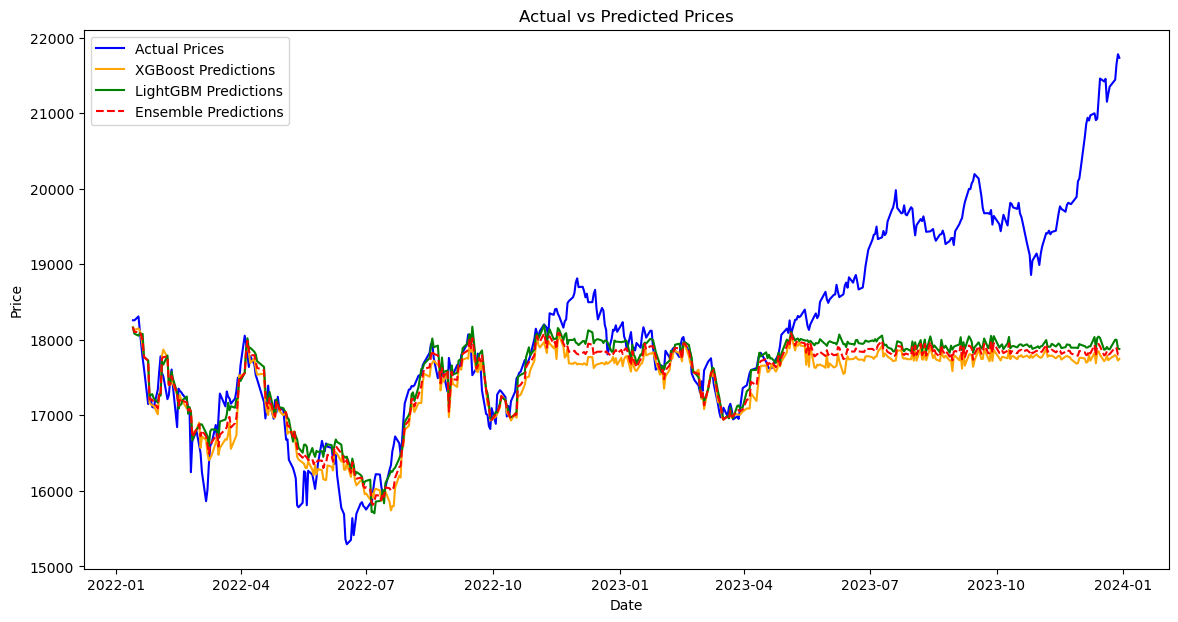

In [147]:
plt.figure(figsize=(14, 7))
plt.plot(df.index[len(df) - len(y_test):], y_test, label='Actual Prices', color='blue')
plt.plot(df.index[len(df) - len(y_test):], xgb_predictions, label='XGBoost Predictions', color='orange')
plt.plot(df.index[len(df) - len(y_test):], lgb_predictions, label='LightGBM Predictions', color='green')
plt.plot(df.index[len(df) - len(y_test):], ensemble_predictions, label='Ensemble Predictions', color='red', linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [149]:
import json
import os
from datetime import datetime

# Define the file to store project updates
update_file = 'project_updates.json'

def load_updates():
    """Load existing updates from the JSON file."""
    if os.path.exists(update_file):
        with open(update_file, 'r') as file:
            return json.load(file)
    return {}

def save_updates(updates):
    """Save updates to the JSON file."""
    with open(update_file, 'w') as file:
        json.dump(updates, file, indent=4)

def log_update(step, status, notes=''):
    """Log an update for a specific step."""
    updates = load_updates()
    updates[step] = {
        'status': status,
        'notes': notes,
        'timestamp': datetime.now().isoformat()
    }
    save_updates(updates)
    print(f"Logged update for step: '{step}'")

def show_updates():
    """Display all logged updates."""
    updates = load_updates()
    if updates:
        for step, details in updates.items():
            print(f"Step: {step}")
            print(f" - Status: {details['status']}")
            print(f" - Notes: {details['notes']}")
            print(f" - Timestamp: {details['timestamp']}")
            print()
    else:
        print("No updates logged yet.")

# Example: Logging your progress
if __name__ == "__main__":
    # You can replace these example log calls with actual project updates.
    log_update('Data Collection', 'Completed', 'Collected historical prices from Alpha Vantage.')
    log_update('Data Preprocessing', 'In Progress', 'Cleaning data and handling missing values.')
    
    # Show all updates
    show_updates()

Logged update for step: 'Data Collection'
Logged update for step: 'Data Preprocessing'
Step: Data Collection
 - Status: Completed
 - Notes: Collected historical prices from Alpha Vantage.
 - Timestamp: 2025-01-23T12:57:30.535206

Step: Data Preprocessing
 - Status: In Progress
 - Notes: Cleaning data and handling missing values.
 - Timestamp: 2025-01-23T12:57:30.555037



In [153]:
log_update('Data Preprocessing', 'Completed', 'Successfully cleaned the dataset and handled missing values.')

Logged update for step: 'Data Preprocessing'


In [155]:
import pandas as pd

# Load the dataset
file_path = 'Nifty50_Cleaned_With_Indicators.csv'  # Update with your file path if needed
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Display basic information about the dataset
print("\nDataset Info:")
print(data.info())

# Check for any missing values
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Preview:
        Price        Close         High          Low         Open  Volume  \
0  2014-01-29  6120.250000  6170.450195  6109.799805  6161.000000  146700   
1  2014-01-30  6073.700195  6082.850098  6027.250000  6067.000000  208100   
2  2014-01-31  6089.500000  6097.850098  6067.350098  6082.750000  146700   
3  2014-02-03  6001.799805  6074.850098  5994.450195  6058.799805  134900   
4  2014-02-04  6000.899902  6017.799805  5933.299805  5947.600098  183300   

        SMA_20       EMA_20       MACD  MACD_Signal  ...        ATR     OBV  \
0  6233.395020  6229.251599  -8.836105  6211.136658  ...  73.425049 -549700   
1  6226.022534  6214.437180 -19.950441  6183.649366  ...  72.960763 -757800   
2  6219.940039  6202.538401 -27.170516  6164.819492  ...  66.800049 -611100   
3  6210.457520  6183.420439 -39.513661  6132.215555  ...  70.289307 -746000   
4  6202.390015  6166.037531 -48.805705  6105.952424  ...  70.371443 -929300   

         Lag_1        Lag_2        Lag_3     

In [162]:
!pip freeze

absl-py==2.1.0
aext-assistant @ file:///C:/b/abs_7e0qjcige6/croot/aext-assistant_1717062202219/work
aext-assistant-server @ file:///C:/b/abs_261y2c9vsm/croot/aext-assistant-server_1717060019302/work
aext-core @ file:///C:/b/abs_1e882xlg8y/croot/aext-core_1717056431204/work
aext-core-server @ file:///C:/b/abs_24av6ljtvu/croot/aext-core-server_1717075079138/work
aext-panels @ file:///C:/b/abs_44bc4hv663/croot/aext-panels_1717062218055/work
aext-panels-server @ file:///C:/b/abs_7f9_48fhp3/croot/aext-panels-server_1717060738001/work
aext-share-notebook @ file:///C:/b/abs_4bhc14ko2x/croot/aext-share-notebook_1717059348177/work
aext-share-notebook-server @ file:///C:/b/abs_2b3c16a8t0/croot/aext-share-notebook-server_1717057990383/work
aext-shared @ file:///C:/b/abs_1ex0tj8g9m/croot/aext-shared_1716991146845/work
aiobotocore @ file:///C:/b/abs_a0zxrsvpwx/croot/aiobotocore_1714464454692/work
aiohttp @ file:///C:/b/abs_8860tt1424/croot/aiohttp_1715108828392/work
aioitertools @ file:///tmp/build

In [164]:
%history -o

import pandas as pd

# Assuming 'df' is your DataFrame containing the historical price data
# Example data structure
# df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

# Creating target for next day's price
df['Next_Close'] = df['Close'].shift(-1)  # Shift to get the next day's close price

# Creating target for price movement (1 for up, 0 for down)
df['Price_Movement'] = (df['Next_Close'] > df['Close']).astype(int)

# Dropping the last row which will have NaN values due to shift
df = df[:-1]

# Displaying the updated DataFrame
df[['Date', 'Close', 'Next_Close', 'Price_Movement']].head(10)  # View the first 10 rows

import json
import getpass
import hashlib

def import_pandas_safely():
    try:
        return __import__('pandas')
    except ImportError:
        return False


__pandas = import_pandas_safely()


def is_data_frame(v: str):
    obj = eval(v)
    if  isinstance(obj, __pandas.core.frame.DataFrame) or isinstance(obj, __pandas.core.series.Series):
        retu

In [166]:
#MODEL ARHCITECTURE 


In [168]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Set input shape for the model according to your data
input_shape = (10, 1)  # Example: 10 days of data, 1 feature (price)

# LSTM Model
def create_lstm_model(input_shape):
    model = keras.Sequential()
    model.add(layers.LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(layers.Dropout(0.2))  # Dropout for regularization
    model.add(layers.LSTM(50, return_sequences=False))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# GRU Model
def create_gru_model(input_shape):
    model = keras.Sequential()
    model.add(layers.GRU(50, return_sequences=True, input_shape=input_shape))
    model.add(layers.Dropout(0.2))  # Dropout for regularization
    model.add(layers.GRU(50, return_sequences=False))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create models
lstm_model = create_lstm_model(input_shape)
gru_model = create_gru_model(input_shape)

# Model summaries
print("LSTM Model Summary:")
lstm_model.summary()

print("\nGRU Model Summary:")
gru_model.summary()

C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Model Summary:


C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 10, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)


GRU Model Summary:


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_12 (GRU)                         │ (None, 10, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_13 (GRU)                         │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,301 (91.02 KB)

 Trainable params: 23,301 (91.02 KB)

 Non-trainable params: 0 (0.00 B)

In [172]:
import pandas as pd

# Load the dataset from CSV file
file_path = 'Nifty50_Cleaned_With_Indicators.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path)

# Display the first 5 rows of the dataset
print(data.head())

        Price        Close         High          Low         Open  Volume  \
0  2014-01-29  6120.250000  6170.450195  6109.799805  6161.000000  146700   
1  2014-01-30  6073.700195  6082.850098  6027.250000  6067.000000  208100   
2  2014-01-31  6089.500000  6097.850098  6067.350098  6082.750000  146700   
3  2014-02-03  6001.799805  6074.850098  5994.450195  6058.799805  134900   
4  2014-02-04  6000.899902  6017.799805  5933.299805  5947.600098  183300   

        SMA_20       EMA_20       MACD  MACD_Signal  ...        ATR     OBV  \
0  6233.395020  6229.251599  -8.836105  6211.136658  ...  73.425049 -549700   
1  6226.022534  6214.437180 -19.950441  6183.649366  ...  72.960763 -757800   
2  6219.940039  6202.538401 -27.170516  6164.819492  ...  66.800049 -611100   
3  6210.457520  6183.420439 -39.513661  6132.215555  ...  70.289307 -746000   
4  6202.390015  6166.037531 -48.805705  6105.952424  ...  70.371443 -929300   

         Lag_1        Lag_2        Lag_3        Lag_4        L

In [174]:
# Check for missing values
print(data.isnull().sum())

# Example normalization using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Select relevant columns for normalization
features = ['Close', 'High', 'Low', 'Open', 'Volume', 'SMA_20', 'EMA_20', 'MACD', 'ATR']
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalize feature columns
data[features] = scaler.fit_transform(data[features])

# Check the first 5 rows after normalization
print(data.head())

Price           0
Close           0
High            0
Low             0
Open            0
Volume          0
SMA_20          0
EMA_20          0
MACD            0
MACD_Signal     0
RSI             0
%K              0
%D              0
Upper Band      0
Lower Band      0
H-L             0
H-PC            0
L-PC            0
TR              0
ATR             0
OBV             0
Lag_1           0
Lag_2           0
Lag_3           0
Lag_4           0
Lag_5           0
Short_MA        0
Long_MA         0
MA_Crossover    0
dtype: int64
        Price     Close      High       Low      Open    Volume    SMA_20  \
0  2014-01-29  0.007564  0.009671  0.011210  0.013515  0.081005  0.010061   
1  2014-01-30  0.004614  0.004121  0.005967  0.007562  0.114909  0.009572   
2  2014-01-31  0.005615  0.005072  0.008514  0.008559  0.081005  0.009169   
3  2014-02-03  0.000057  0.003615  0.003884  0.007042  0.074489  0.008540   
4  2014-02-04  0.000000  0.000000  0.000000  0.000000  0.101215  0.008006   

  

In [180]:
#model architecture main

C:\Users\prana\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


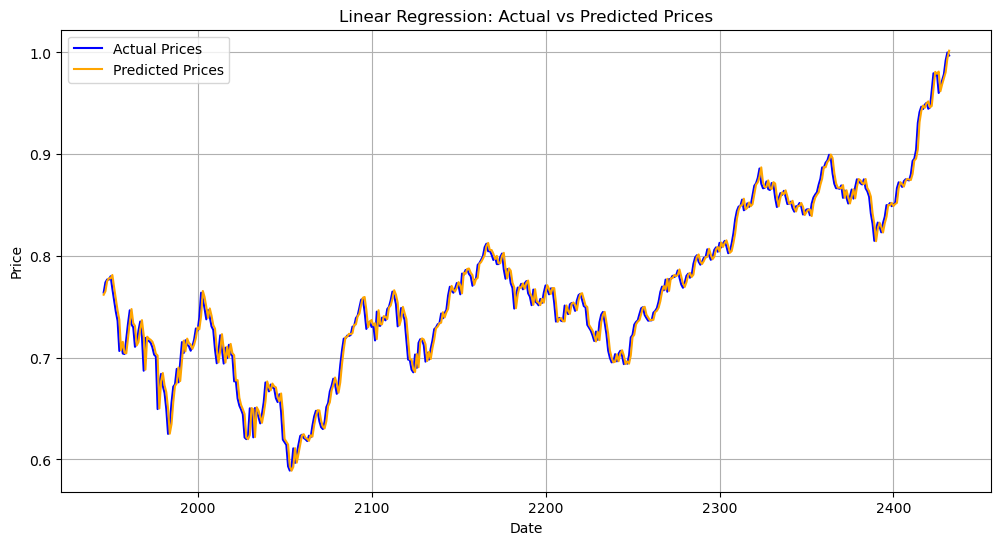

(0.007450014519727042, 0.009842945961818504)

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Assuming that `data` is the DataFrame we have prepared and normalized.

# We will create Lag features and a target variable for the next day Close price
data['Target'] = data['Close'].shift(-1)  # Next day's Close price
data.dropna(inplace=True)  # Remove the last row with NaN Target value

# Selecting features and target variable
features = ['Close', 'SMA_20', 'EMA_20', 'MACD', 'ATR', 'Volume']  # Included indicators
X = data[features]
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train the Linear Regression model
lg_model = LinearRegression()
lg_model.fit(X_train, y_train)

# Make predictions
y_pred = lg_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='orange')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

mae, rmse

        Price        Close         High          Low         Open  Volume  \
0  2014-01-29  6120.250000  6170.450195  6109.799805  6161.000000  146700   
1  2014-01-30  6073.700195  6082.850098  6027.250000  6067.000000  208100   
2  2014-01-31  6089.500000  6097.850098  6067.350098  6082.750000  146700   
3  2014-02-03  6001.799805  6074.850098  5994.450195  6058.799805  134900   
4  2014-02-04  6000.899902  6017.799805  5933.299805  5947.600098  183300   

        SMA_20       EMA_20       MACD  MACD_Signal  ...        ATR     OBV  \
0  6233.395020  6229.251599  -8.836105  6211.136658  ...  73.425049 -549700   
1  6226.022534  6214.437180 -19.950441  6183.649366  ...  72.960763 -757800   
2  6219.940039  6202.538401 -27.170516  6164.819492  ...  66.800049 -611100   
3  6210.457520  6183.420439 -39.513661  6132.215555  ...  70.289307 -746000   
4  6202.390015  6166.037531 -48.805705  6105.952424  ...  70.371443 -929300   

         Lag_1        Lag_2        Lag_3        Lag_4        L

C:\Users\prana\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


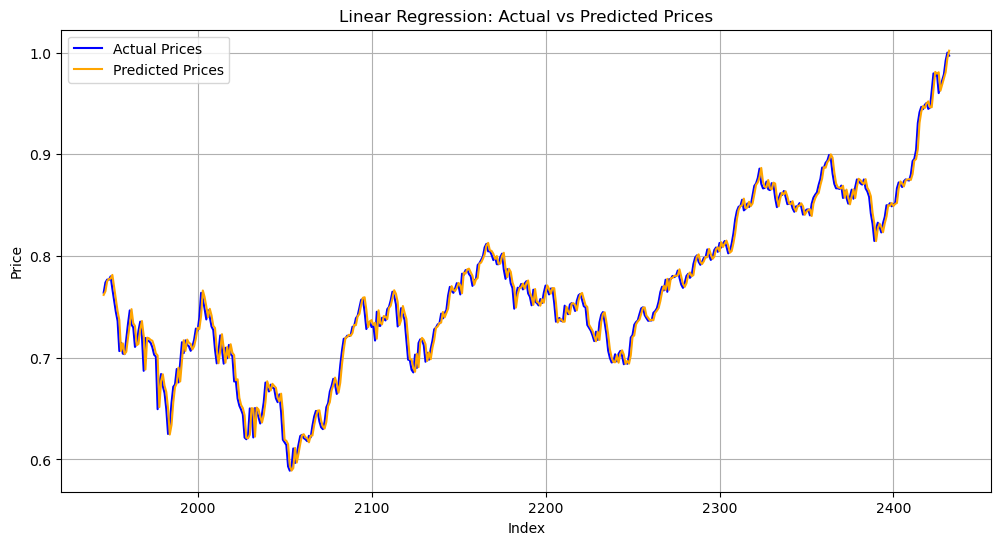

Mean Absolute Error: 0.007477292543915161
Root Mean Squared Error: 0.00987338345356052


In [184]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the dataset from CSV
data = pd.read_csv('Nifty50_Cleaned_With_Indicators.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Normalize the relevant columns (update based on actual columns in your CSV)
# Example columns to normalize could be adjusted based on your dataset
columns_to_normalize = ['Close', 'High', 'Low', 'Open', 'Volume', 'SMA_20', 'EMA_20', 'MACD', 'ATR']
scaler = MinMaxScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Create target variable for next day's Close price
data['Target'] = data['Close'].shift(-1)  # Target is the next day's Close
data.dropna(inplace=True)  # Drop NaN values

# Define features and target variables
X = data[columns_to_normalize]
y = data['Target']

# Check if there’s enough data to split into train and test sets
if len(X) > 1:  # Ensure we have more than 1 sample
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Visualize the results
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
    plt.plot(y_test.index, y_pred, label='Predicted Prices', color='orange')
    plt.title('Linear Regression: Actual vs Predicted Prices')
    plt.xlabel('Index')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f'Mean Absolute Error: {mae}')
    print(f'Root Mean Squared Error: {rmse}')
else:
    print("Not enough data for training the model.")

R-squared: 1.00
Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00


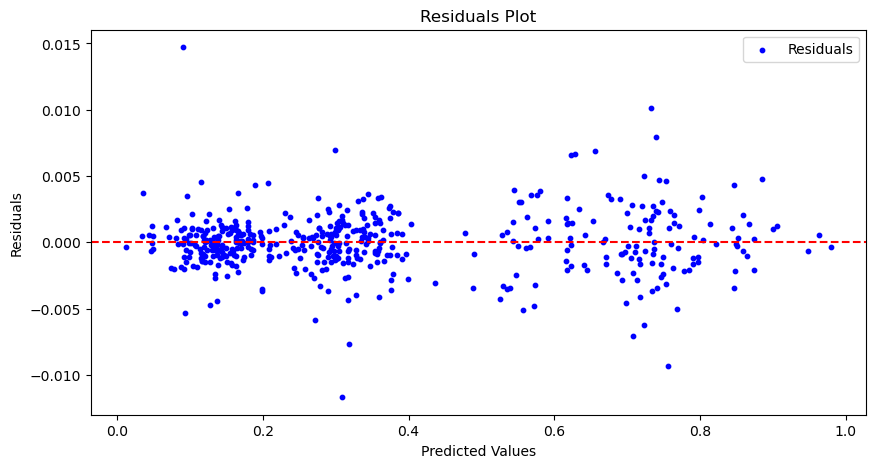

In [186]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select features and target
features = data[['High', 'Low', 'Open', 'Volume', 'SMA_20', 'EMA_20', 'MACD', 'RSI']]
target = data['Close']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Linear Regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print(f'R-squared: {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Plotting residuals
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, y_pred - y_test, color='blue', s=10, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

Columns in the dataset: Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume', 'SMA_20', 'EMA_20',
       'MACD', 'MACD_Signal', 'RSI', '%K', '%D', 'Upper Band', 'Lower Band',
       'H-L', 'H-PC', 'L-PC', 'TR', 'ATR', 'OBV', 'Lag_1', 'Lag_2', 'Lag_3',
       'Lag_4', 'Lag_5', 'Short_MA', 'Long_MA', 'MA_Crossover'],
      dtype='object')
R-squared: 1.00
Mean Absolute Error (MAE): 24.51
Mean Squared Error (MSE): 1268.25
Root Mean Squared Error (RMSE): 35.61


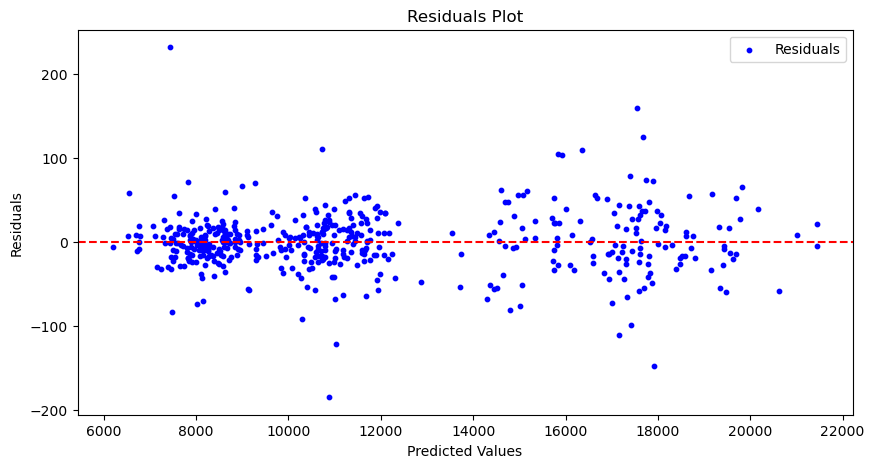

In [200]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset from CSV
data = pd.read_csv('Nifty50_Cleaned_With_Indicators.csv')

# Clean column names
data.columns = data.columns.str.strip()  # Remove any leading/trailing spaces

# Display the column names to ensure they are correct
print("Columns in the dataset:", data.columns)

# Select features and target
features = data[['High', 'Low', 'Open', 'Volume', 'SMA_20', 'EMA_20', 'MACD', 'RSI']]
target = data['Close']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Linear Regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print(f'R-squared: {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Plotting residuals
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, y_pred - y_test, color='blue', s=10, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

Columns in the dataset: Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume', 'SMA_20', 'EMA_20',
       'MACD', 'MACD_Signal', 'RSI', '%K', '%D', 'Upper Band', 'Lower Band',
       'H-L', 'H-PC', 'L-PC', 'TR', 'ATR', 'OBV', 'Lag_1', 'Lag_2', 'Lag_3',
       'Lag_4', 'Lag_5', 'Short_MA', 'Long_MA', 'MA_Crossover'],
      dtype='object')
R-squared: 1.00
Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00


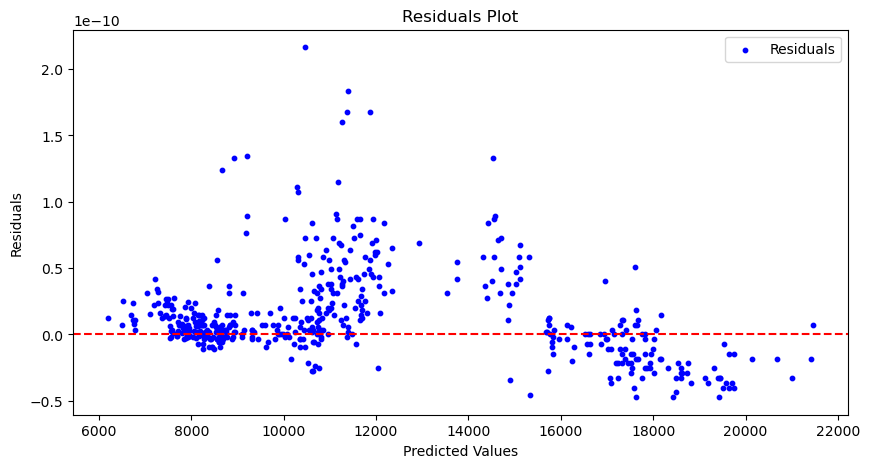

In [208]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the CSV file for the new dataset
data = pd.read_csv('Nifty50_Cleaned_With_Indicators.csv')

# Clean column names
data.columns = data.columns.str.strip()  # Remove any leading/trailing spaces

# Display the column names to ensure they are correct
print("Columns in the dataset:", data.columns)

# Select features and target
# Including all relevant features as requested
features = data[['High', 'Low', 'Open', 'Volume', 'SMA_20', 'EMA_20', 'MACD', 
                 'RSI', '%K', '%D', 'Upper Band', 'Lower Band', 'H-L', 'H-PC', 
                 'L-PC', 'TR', 'ATR', 'OBV', 'Lag_1', 'Lag_2', 'Lag_3', 
                 'Lag_4', 'Lag_5', 'Short_MA', 'Long_MA', 'MA_Crossover']]
target = data['Close']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Linear Regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print(f'R-squared: {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Plotting residuals
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, y_pred - y_test, color='blue', s=10, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

Columns in the dataset: Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume', 'SMA_20', 'EMA_20',
       'MACD', 'MACD_Signal', 'RSI', '%K', '%D', 'Upper Band', 'Lower Band',
       'H-L', 'H-PC', 'L-PC', 'TR', 'ATR', 'OBV', 'Lag_1', 'Lag_2', 'Lag_3',
       'Lag_4', 'Lag_5', 'Short_MA', 'Long_MA', 'MA_Crossover'],
      dtype='object')
R-squared: 1.00
Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00


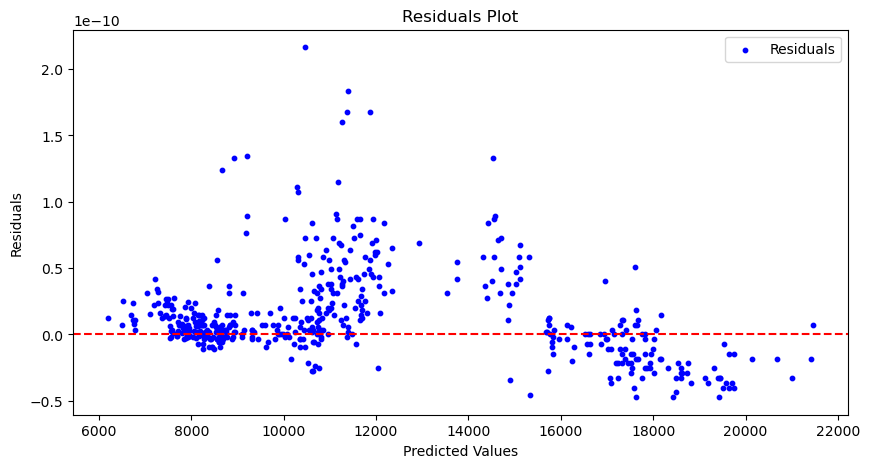

In [210]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the CSV file for the new dataset
data = pd.read_csv('Nifty50_Cleaned_With_Indicators.csv')

# Clean column names
data.columns = data.columns.str.strip()  # Remove any leading/trailing spaces

# Display the column names to ensure they are correct
print("Columns in the dataset:", data.columns)

# Select features and target
# Including all relevant features as requested
features = data[['High', 'Low', 'Open', 'Volume', 'SMA_20', 'EMA_20', 'MACD', 
                 'RSI', '%K', '%D', 'Upper Band', 'Lower Band', 'H-L', 'H-PC', 
                 'L-PC', 'TR', 'ATR', 'OBV', 'Lag_1', 'Lag_2', 'Lag_3', 
                 'Lag_4', 'Lag_5', 'Short_MA', 'Long_MA', 'MA_Crossover']]
target = data['Close']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Linear Regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print(f'R-squared: {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Plotting residuals
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, y_pred - y_test, color='blue', s=10, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

In [212]:
####2. Decision Trees and Random Forests
Suitable Indicators:
SMA and EMA: For trend identification.
MACD (Moving Average Convergence Divergence): Helps identify momentum shifts.
Bollinger Bands: Used to measure market volatility.
On-Balance Volume (OBV): To assess the volume flowing in and out.

SyntaxError: invalid syntax (2848934405.py, line 2)

In [222]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Clean column names
data.columns = data.columns.str.strip()  # Remove leading/trailing spaces

# Select suitable features
features = data[['SMA_20', 'EMA_20', 'MACD', 'Upper Band', 'Lower Band', 'OBV']]
target = data['Close']  # Define the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predicting using Decision Tree
y_pred_dt = dt_model.predict(X_test)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate Decision Tree Model
print("Decision Tree Performance:")
print(f'R-squared: {r2_score(y_test, y_pred_dt):.2f}')
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_dt):.2f}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_dt):.2f}')
print(f'Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_dt)):.2f}')

# Evaluate Random Forest Model
print("\nRandom Forest Performance:")
print(f'R-squared: {r2_score(y_test, y_pred_rf):.2f}')
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_rf):.2f}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_rf):.2f}')
print(f'Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}')

Decision Tree Performance:
R-squared: 1.00
Mean Absolute Error (MAE): 101.96
Mean Squared Error (MSE): 25021.61
Root Mean Squared Error (RMSE): 158.18

Random Forest Performance:
R-squared: 1.00
Mean Absolute Error (MAE): 75.49
Mean Squared Error (MSE): 13807.40
Root Mean Squared Error (RMSE): 117.50


In [226]:
pip install pandas numpy seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


First five rows of the dataset:
        Price        Close         High          Low         Open  Volume  \
0  2014-01-29  6120.250000  6170.450195  6109.799805  6161.000000  146700   
1  2014-01-30  6073.700195  6082.850098  6027.250000  6067.000000  208100   
2  2014-01-31  6089.500000  6097.850098  6067.350098  6082.750000  146700   
3  2014-02-03  6001.799805  6074.850098  5994.450195  6058.799805  134900   
4  2014-02-04  6000.899902  6017.799805  5933.299805  5947.600098  183300   

        SMA_20       EMA_20       MACD  MACD_Signal  ...        ATR     OBV  \
0  6233.395020  6229.251599  -8.836105  6211.136658  ...  73.425049 -549700   
1  6226.022534  6214.437180 -19.950441  6183.649366  ...  72.960763 -757800   
2  6219.940039  6202.538401 -27.170516  6164.819492  ...  66.800049 -611100   
3  6210.457520  6183.420439 -39.513661  6132.215555  ...  70.289307 -746000   
4  6202.390015  6166.037531 -48.805705  6105.952424  ...  70.371443 -929300   

         Lag_1        Lag_2   

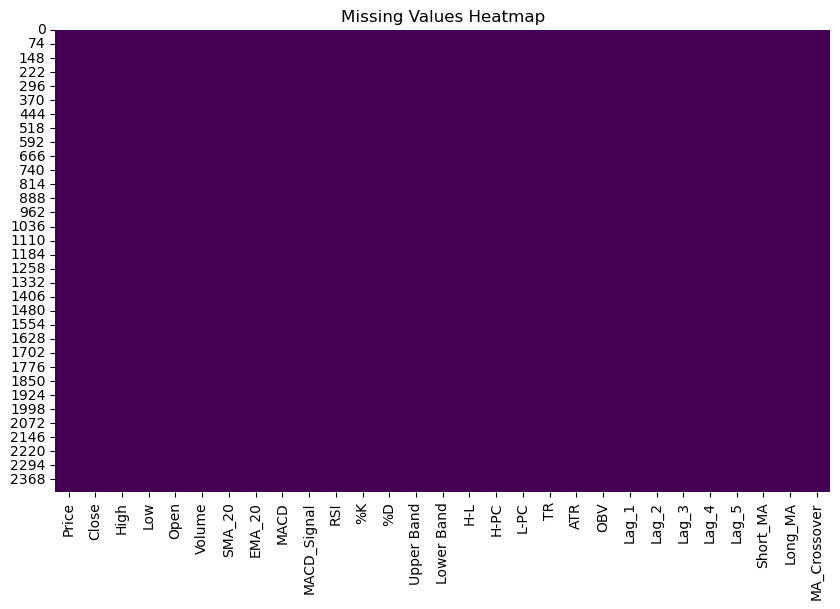

In [228]:
import pandas as pd
import numpy as np

# Step 1: Load the dataset
# Replace 'your_dataset.csv' with the path to your actual dataset
# Load the CSV file for the new dataset
data = pd.read_csv('Nifty50_Cleaned_With_Indicators.csv')

# Step 2: Explore the dataset
# Display the first few rows of the dataset
print("First five rows of the dataset:")
print(data.head())

# Check the basic statistics of the dataset
print("\nSummary statistics of the dataset:")
print(data.describe())

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Check data types
print("\nData types of each feature:")
print(data.dtypes)

# Visual summary of missing data (requires seaborn and matplotlib)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [230]:
# Step 1: Convert the 'Price' column to datetime format
data['Price'] = pd.to_datetime(data['Price'])

# Step 2: Feature Selection
# For this example, let's choose 'Close' as the target variable and drop 'Price'
features = data.drop(['Price', 'Close'], axis=1)
target = data['Close']

# Step 3: Train-Test Split
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

print("\nTrain and Test Sets:")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Step 4: Initial Model Training using Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate the model on the test set
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nModel Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")


Train and Test Sets:
X_train shape: (1947, 27), y_train shape: (1947,)
X_test shape: (487, 27), y_test shape: (487,)

Model Performance Metrics:
Mean Absolute Error (MAE): 497.42234565499865
Mean Squared Error (MSE): 743207.8490123304
Root Mean Squared Error (RMSE): 862.0950347916003
R-squared: 0.5528843334943814


In [241]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [249]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
from itertools import product

# Sample Data Preparation
# Assume X and y are your features and target data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Define the parameter distribution for Random Forest
n_estimators_options = [100, 200, 300]
max_depth_options = [None, 10, 20, 30]
min_samples_split_options = [2, 5]
min_samples_leaf_options = [1, 2]
max_features_options = ['sqrt', 'log2']  # Removed 'auto'

# Creating all combinations of parameters
param_combinations = list(product(n_estimators_options, max_depth_options, 
                                   min_samples_split_options, min_samples_leaf_options, 
                                   max_features_options))

# Number of iterations
n_iterations = len(param_combinations)
best_score = float('inf')
best_params = {}

# Step 3: Loop through parameter combinations with progress bar
for params in tqdm(param_combinations):
    n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features = params
    
    # Initialize a Random Forest Regressor with current parameters
    rf = RandomForestRegressor(n_estimators=n_estimators,
                                max_depth=max_depth,
                                min_samples_split=min_samples_split,
                                min_samples_leaf=min_samples_leaf,
                                max_features=max_features,
                                random_state=42)
    
    # Fit the model
    rf.fit(X_train, y_train)
    
    # Predict on the training set
    y_pred = rf.predict(X_train)
    
    # Calculate the mean squared error
    mse = mean_squared_error(y_train, y_pred)
    
    # Update best score and parameters if current MSE is better
    if mse < best_score:
        best_score = mse
        best_params = {
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'max_features': max_features
        }

# Step 4: Display results
print("Best Hyperparameters:", best_params)
print("Best CV MSE:", best_score)

100%|██████████████████████████████████████████████████████████████████████████████████| 96/96 [02:21<00:00,  1.48s/it]

Best Hyperparameters: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Best CV MSE: 535.6736217069639


In [253]:
# Specify target variable
target_column = 'Close'  # Replace this with your actual target variable name
feature_columns = data.columns[data.columns != target_column].tolist()  # All other columns will be features

In [259]:
pip install pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


Mean Squared Error: 2146.9972101444923
R-squared: 0.9998522626204026


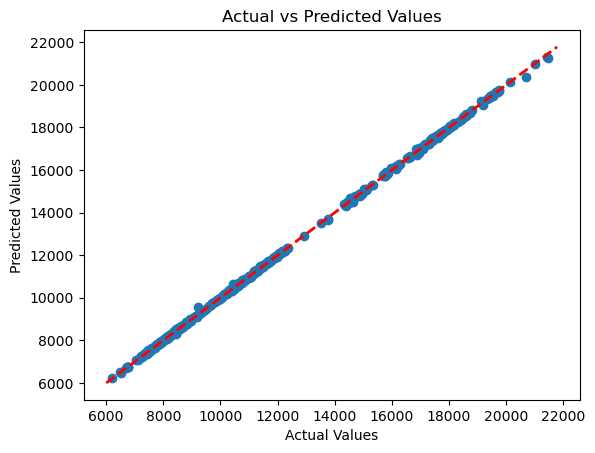

In [263]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Nifty50_Cleaned_With_Indicators.csv')

# Convert 'Price' column to datetime
data['Price'] = pd.to_datetime(data['Price'], errors='coerce')  # Convert to datetime
data.drop(['Price'], axis=1, inplace=True)  # Drop the Price column as it is not needed for prediction

# Check and convert non-numeric columns to numeric
X = data.select_dtypes(include=[np.number])  # Select only numeric columns
y = data['Close']  # Target variable

# Ensure no NaN values are present
X.fillna(0, inplace=True)  # Fill NaN values with 0 or use X.dropna() to drop them
y.fillna(0, inplace=True)  # Similarly handle target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor with the best hyperparameters
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, linestyle='--')
plt.show()

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Nifty50_Cleaned_With_Indicators.csv')

# Convert 'Price' column to datetime
data['Price'] = pd.to_datetime(data['Price'], errors='coerce')  # Convert to datetime
data.drop(['Price'], axis=1, inplace=True)  # Drop the Price column as it is not needed for prediction

# Check and convert non-numeric columns to numeric
X = data.select_dtypes(include=[np.number])  # Select only numeric columns
y = data['Close']  # Target variable

# Ensure no NaN values are present
X.fillna(0, inplace=True)  # Fill NaN values with 0 or handle them appropriately
y.fillna(0, inplace=True)  # Similarly handle target variable

# Initialize the Random Forest Regressor with the best hyperparameters
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)

# Perform k-fold cross-validation (e.g., 5 folds)
mse_scorer = make_scorer(mean_squared_error)
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring=mse_scorer)

# Calculate average MSE and standard deviation
mean_mse = np.mean(cv_scores)
std_mse = np.std(cv_scores)

# Output the results
print(f'Mean Cross-Validation MSE: {mean_mse}')
print(f'Standard Deviation of MSE: {std_mse}')

Mean Cross-Validation MSE: 207384.4619509936
Standard Deviation of MSE: 291170.6042355816


In [81]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

# Load the dataset
data = pd.read_csv('Nifty50_Cleaned_With_Indicators.csv')

# Convert 'Price' column to datetime
data['Price'] = pd.to_datetime(data['Price'], errors='coerce')  # Convert to datetime
data.drop(['Price'], axis=1, inplace=True)  # Drop the Price column as it is not needed for prediction

# Check and convert non-numeric columns to numeric
X = data.select_dtypes(include=[np.number])  # Select only numeric columns
y = data['Close']  # Target variable

# Ensure no NaN values are present
X.fillna(0, inplace=True)  # Fill NaN values with 0 or handle them appropriately
y.fillna(0, inplace=True)  # Similarly handle target variable

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200],  # Reduced for quicker testing
    'max_features': ['sqrt', None],  # Removed 'auto'
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create a generator for tqdm to track progress
def grid_search_with_progress(model, param_grid, X, y):
    results = []
    
    for n_estimators in tqdm(param_grid['n_estimators'], desc='n_estimators', position=0):
        for max_features in tqdm(param_grid['max_features'], desc='max_features', position=1):
            for max_depth in tqdm(param_grid['max_depth'], desc='max_depth', position=2):
                for min_samples_split in tqdm(param_grid['min_samples_split'], desc='min_samples_split', position=3):
                    for min_samples_leaf in tqdm(param_grid['min_samples_leaf'], desc='min_samples_leaf', position=4):
                        model.set_params(n_estimators=n_estimators,
                                         max_features=max_features,
                                         max_depth=max_depth,
                                         min_samples_split=min_samples_split,
                                         min_samples_leaf=min_samples_leaf)
                        # Fit the model and compute the MSE
                        model.fit(X, y)
                        score = -mean_squared_error(y, model.predict(X))  # Store negative MSE
                        results.append((score, model.get_params()))
    
    best_score, best_params = max(results, key=lambda x: x[0]) 
    return best_params, -best_score  # Return best parameters and best score in positive MSE

# Use the function to perform grid search with a progress bar
rf_model = RandomForestRegressor(random_state=42)
best_params, best_score = grid_search_with_progress(rf_model, param_grid, X, y)

# Output the best parameters and score
print("Best Hyperparameters:", best_params)
print(f"Best Cross-Validated MSE: {best_score}")

max_features:   0%|                                                                              | 0/2 [00:00<?, ?it/s]

max_depth:   0%|                                                                                 | 0/2 [00:00<?, ?it/s]


min_samples_split:   0%|                                                                         | 0/2 [00:00<?, ?it/s]



min_samples_leaf:   0%|                                                                          | 0/2 [00:00<?, ?it/s]



min_samples_leaf:  50%|█████████████████████████████████                                 | 1/2 [00:01<00:01,  1.05s/it]



min_samples_leaf: 100%|██████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.02it/s]



min_samples_split:  50%|████████████████████████████████▌                                | 1/2 [00:01<00:01,  1.96s/it]



min_samples_leaf:   0%|                                                                          | 0/2 [00:00<?, ?it/s]



min_samples_leaf:  

Best Hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Best Cross-Validated MSE: 57.10767595375737


In [82]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)

# Display results
accuracy, precision, recall, f1, cm_display

(1.0,
 1.0,
 1.0,
 1.0,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1eb10ed89e0>)

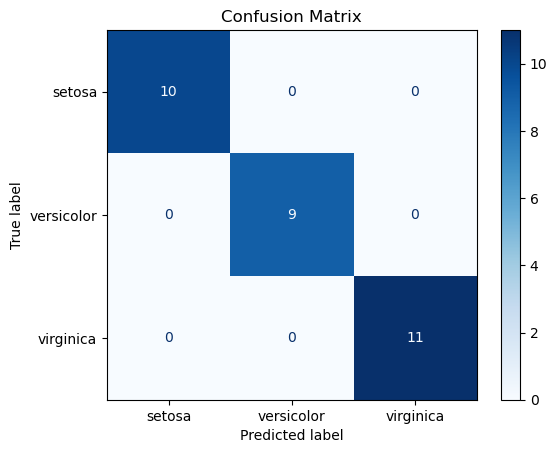

In [83]:
import matplotlib.pyplot as plt

# Plot the confusion matrix
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()